In [10]:
# # @title Run Cell to Submit for Autograding!
# from google.colab import auth
# auth.authenticate_user()
# import requests
# gcloud_token = !gcloud auth print-access-token
# token_base = gcloud_token[0]
# base_url = "https://us-east4-dsan5500.cloudfunctions.net/grade-sub-sandbox"
# ag_params = {'t': token_base, 'course': 'DSAN5500', 'assignment': 'HW2'}
# response = requests.get(base_url, params=ag_params)
# print(response.text)

In [11]:
# @title Assignment Corrections (Run Cell to Fetch / Refresh)
import base64
import datetime
import json
from urllib.request import urlopen
from IPython.display import Markdown
exec_tz = datetime.datetime.now().astimezone().tzinfo
exec_timestamp = datetime.datetime.now(tz=exec_tz).strftime("%Y-%m-%d %H:%M:%S %Z")
gh_url = "https://api.github.com/repos/jpowerj/dsan-corrections/contents/2024-spr-dsan5500/DSAN5500_HW2_Corrections.md?ref=main"
md_data = json.load(urlopen(gh_url))
md_content_b64 = md_data['content']
md_content = base64.b64decode(md_content_b64).decode('utf-8')
corrections_content = md_content + f"\n\nLast fetched: {exec_timestamp}"
Markdown(corrections_content)

**DSAN 5500 HW2 Corrections:** (If you are working in Colab, your notebook has been auto-updated to reflect these corrections)

* *(2024-02-21, 11pm EST)* For Part 5, in lines 21 and 22 of the cell titled `define-alpha-hasher-2`, `AlphaHasher2` should be changed to just `self`: `first_letter_pos = self.compute_position_in_alphabet(first_letter)` (line 21), `second_letter_pos = self.compute_position_in_alphabet(second_letter)` (line 22). *(Thank you to Yanfeng for finding this fix!)*
* *(2024-02-20, 8pm EST)* I have added a `__len__()` function to the provided `BinarySearchTree` and `BSTNode` classes, to make it easier for you to implement the `__len__()` function in `LogarithmicHashTable` (Q4.1), since you can now use `len()` to find the number of items in any slot containing a `BinarySearchTree`. *(Thank you to Yanfeng for suggesting this!)*
* *(2024-02-19, 7pm EST)* Within the starter code for Question 1.1 (so, the cell titled `Q1.1-response`), in line 33, the call to `self.hasher.compute_letter_for_index(i)` should be changed to `self.hasher.compute_key_for_index(i)`. *(Thank you to Yifan for finding this!)*
* *(2024-02-19, 7pm EST)* Within the cell titled `define-linked-list`, line 84 should be changed from `if self.content == item or self.content.item_name == item:` to `if self.content == item or self.content[0] == item`, since `self.content` should be of type `tuple`. *(Thank you to Yanfeng for finding this one!)*
* *(2024-02-18, 11pm EST)* Within the cell titled `define-alpha-hasher`, line 40 should be changed from `return AlphaHasher.compute_position_in_alphabet(first_letter)` to `return self.compute_position_in_alphabet(first_letter)`. *(Thank you to Yifan for finding this!)*


Last fetched: 2024-02-23 22:42:08 东京标准时间

# DSAN 5500 Homework 2: Data Structures, Algorithms, and Complexity

**Due Friday, February 23, 5:59pm EST**

Since we've now covered the Hash Table, and since you now have experience with the basics of how a Linked List is implemented, the goal of this homework is to **bring these two pieces of your knowledge together** by showing how:

1. "Naïve" Hash Tables, until they are **paired** with some minimally-efficient method for handling **collisions**, are not very useful on their own (Part 1)
2. However, since we now know about Linked Lists, we can **use a Linked List structure within our Hash Table implementation** to achieve an actually-useful (non-naïve) Hash Table achieving $O(1 + \epsilon n)$ runtime (Part 2)
3. Once you've seen how these two can be put together, we'll look at a **simple modification** we can make to the Linked List structure to create a **Binary Search Tree** structure, which can store and retrieve elements in $O(\log_2(n))$ time, faster than the $O(n)$ runtime of the Linked List (Part 3)
4. Then, once we've seen this Binary Search Tree Structure, we can return to our Hash Tables from Part 2 and **replace the Linked List structure being used to handle collisions** with a **Binary Search Tree structure instead**, to transform the Hash Table's runtime from $O(1 + \epsilon n)$ to $O(1 + \epsilon \log_2(n))$ (Part 4)
5. Finally, we will make one simple modification to our LogarithmicHashTable, using the first **two** letters of each key as the hash code (instead of just the first letter), which will bring us yet closer to full-on $O(1)$ time. This improvement illustrates how, by increasing the **memory** allocated for the fixed-length array in our hash table, we can get **arbitrarily close** to $O(1)$! (Part 5)

## Part 1: Naïve Hash Tables (Without Collision Handling)

Of all the parts on this assignment, this is the only one where you'll be making a structure that you would **not** want to use in real life! It's incredibly important for learning, however, since

* (a) we'll see why a hash table **on its own**---that is, without any reasonably-efficient way to handle **collisions**---is not really a data structure at all (since it **loses information** that was previously added to it). However,
* (b) we'll be able to use the code for our non-useful Naïve Hash Table as the basis for a **useful Hash Table**, which you'll write in Part 2.

First things first, however, we'll need a **hash function** which can take the **keys** we want to store in our hash table and deterministically derive a **slot** in our fixed-length array where a given key should be stored. To achieve this, run the following cell, which creates an `AlphaHasher` class that we'll use to hash `str` values. Specifically, this class will compute the hash value for a `str` as the **index in the alphabet** of the **first letter of the string**:

* `"Aardvark"` will be mapped to `0` since `"A"` is the letter at index `0` of the English alphabet,
* `"Banana"` will be mapped to `1` since `"B"` is the letter at index `1` in the English alphabet, and so on, up to...
* `"Zebra"`, which will be mapped to `25`.

Note that, in Part 5, we'll switch from using `AlphaHasher` to using a new `DoubleAlphaHasher` class to hash based on the first **two** letters of the string, rather than just the first letter. While we'll stick to the pattern of having both `AlphaHasher` and `DoubleAlphaHasher` classes for now, since there are only two different versions, you can imagine how it could be helpful to **change the design pattern** we're using, to allow users to **specify** how many letters to use for hashing: rather than creating separate classes `AlphaHasher`, `DoubleAlphaHasher`, `TripleAlphaHasher`, etc., we could just create a single `NAlphaHasher` class which would allow users to specify how many letters of the string they want the hashing to use!

In [66]:
# @title define-alpha-hasher
from abc import ABC, abstractmethod
import string

class CustomHasher(ABC):
  @abstractmethod
  def __init__(self):
    pass

  @abstractmethod
  def get_alphabet_size(self):
    pass

  @abstractmethod
  def hash(self, str_to_hash: str) -> int:
    pass

  @abstractmethod
  def compute_position_in_alphabet(self, uppercase_key: str) -> int:
    pass

  @abstractmethod
  def compute_key_for_index(self, index: int) -> str:
    pass

class AlphaHasher(CustomHasher):
  def __init__(self):
    self.alphabet_size = 26

  def get_alphabet_size(self):
    return self.alphabet_size

  def hash(self, str_to_hash: str) -> int:
    if len(str_to_hash) == 0:
      first_letter = 'A'
    else:
      first_letter = str_to_hash.upper()[0]
    # And return its index in the alphabet:
    # 'A' has index 0, 'B' has index 1, etc.
    return self.compute_position_in_alphabet(first_letter)

  def compute_position_in_alphabet(self, uppercase_key: str) -> int:
    return string.ascii_uppercase.index(uppercase_key)

  def compute_key_for_index(self, index: int) -> str:
    return string.ascii_uppercase[index]

### Question 1.1: The `NaiveHashTable` Class

In the following cell, build on the provided starter code to create a working `NaiveHashTable` class. Each of the bullet points here represents an element of this class that your code should implement.

* `__init__(self) -> None`. This **constructor** function should take only the required `self` argument, but will also perform the following initialization steps, which are already written for you:
  * Create an **instance variable** called `fixed_length_array`, whose value should be initialized to an **empty NumPy array** object with size `26` (for the 26 "slots" in the English alphabet). Specifically, you'll need to create this empty array using NumPy's <a href='https://numpy.org/doc/stable/reference/generated/numpy.empty.html' target='_blank'>`np.empty()` function</a>.
  * Create an **instance variable** called `num_added`, initialized to the `int` value `0` (this will be incremented each time the `add()` function runs)
  * Create an **instance variable** called `num_collisions`, initialized to the `int` value `0` (this will be incremented each time the `add()` function encounters a collision)
* `add(key: str, value: object) -> bool`

  This function should:

  1. Create a variable called `data` and assign the tuple `(key, value)` as its value,
  2. **Use the `hash()` function from `AlphaHasher`** to **hash** the value of the `key` argument, storing this hashed value (which will be of type `int`) into a variable called `key_hash`. However, here you will need to be careful and include a **check** to determine whether or not the variable `key` is in fact a **string**. If `key` is an **instance of** the `str` type, then your code can safely call `hash(key)` without issue. If it is not, however, your function should **not** try to call `hash(key)`, and should instead just return the `bool` value `False`. Thus, users of your `NaiveHashTable` class will know that if the `add()` function returned `False` it means the `key` they provided was **not hashable** given our `AlphaHasher` setup.

    Note how we *can* (and should!) include a `str` **type hint** for the `key` argument in the specification of `add()` above, but since Python does not **enforce** type hints, we still ask you to perform this check within the `add()` function. The rationale for this is: if you are developing **for yourself** or in a **small team**, you can either (a) trust yourself and your teammates to look at and never violate the type hints, **or** (b) set up your personal/team development environment so that it **runs a type-checker like MyPy** on each `.py`/`.ipynb` file before running it. For larger collaborative projects, however (for example, the many popular open-source projects with hundreds of contributors on GitHub), it will almost **never** be the case that they run MyPy before running Python code, sadly!
  3. If the function did not return `False` during the previous step, and we were able to successfully compute a hash value for `key`, then store the `(key, value)` tuple (the value assigned to the variable `data` in Step 1) in the specific "slot" within `base_array` with index `key_hash`. For example: if the value of `key_hash` is `0`, store the tuple as the **first** element of `self.fixed_length_array`; if the value of `key_hash` is `1`, store the tuple as the **second** element of `fixed_length_array`; and so on. However, here you will need to be careful to **check whether there was a collision or not!** If the previous value in the slot **was not `None`**, then there has been a **collision**, so that you should **increment the `self.num_collisions` instance variable** before you replace the previous value in the slot with the new value!
  4. Once the slot within `self.fixed_length_array` has been updated, make sure to also **increment the `self.num_added` instance variable**. By tracking the number of collisions at the end of Step 3, and tracking the number of items added in this step, the `compute_collision_rate()` function described below should only require 1 or 2 lines of code!
* `get_item_at_index(self, index: int) -> object`
  * This function should just return whatever happens to be stored in slot `index` of the `fixed_length_array` instance variable. So, `get_item_at_index(0)` should return `self.fixed_length_array[0]`, `get_item_at_index(1)` should return `self.fixed_length_array[1]`, and so on. You should implement this **before** using `to_string()`, however, since `to_string()` uses this function to **display the entries within each slot of `self.fixed_length_array`**.
* `__len__(self) -> int`
  * This function should just return the number of **slots** within `self.fixed_length_array` that contain non-`None` values. In other words, it should return the number of **"filled" slots** in the hash table. Note that this is **not the same as `num_added`**!! This is important to notice here since, it's precisely why our `NaiveHashTable` is not a usable data structure (yet): when the `add()` function encounters a **collision**, the previously-stored value is **thrown out** and replaced by a new value. This means that, for example, the user may have added 20 items to the `NaiveHashTable`, but `__len__()` may only return `16`, indicating that there were **4 collisions** among the 20 calls to `add()`!
* `compute_collision_rate(self) -> float`
  * This function should use the `num_added` and `num_collisions` instance variables to compute the **collision rate** for the `NaiveHashTable` object. If **no items have been added yet** (i.e., if the `NaiveHashTable` object is empty), this function should just return the `float` value `0.0`. However, as long as the object has one or more entries, this function should return the **ratio** of the **number of collisions** to the **number of successful calls to `add()`** (there are two instance variables you defined in the constructor which will help you here 😜)
* `__str__(self) -> str` and `__repr__() -> str`
  * The starter code defines an **instance method** for you, within the `NaiveHashTable` class, called `to_string()`. Your `NaiveHashTable` should implement both the `__str__()` and `__repr__()` functions, but all that these two functions need to do is simply **return the result of calling `self.to_string()`**.

  The `to_string()` function here allows us to straightforwardly visualize the contents of our `NaiveHashTable`: it will always produce exactly 26 lines, where each line corresponds to a "slot" in our `fixed_length_array`, showing the alphabetical letter that hashes to the slot and then the value stored in that slot. For example, if we've added the three datapoints `('Aardvark', 10)`, `('Popsicle', 20)`, and `('Coconut', 30)` in a `NaiveHashTable` object `naive_ht`, then `naive_ht.to_string()` will produce the following output:

  ```
  A: ('Aardvark', 10)
  B: None
  C: ('Coconut', 30)
  D: None
  E: None
  F: None
  G: None
  H: None
  I: None
  J: None
  K: None
  L: None
  M: None
  N: None
  O: None
  P: ('Popsicle', 20)
  Q: None
  R: None
  S: None
  T: None
  U: None
  V: None
  W: None
  X: None
  Y: None
  Z: None
  ```

  In the remaining parts of the assignment, having this `to_string()` function will serve another important purpose, but for now it simply allows us to "unify" the `__repr__()` and `__str__()` implementations into a single function.

In [52]:
# @title Q1.1-response
import string

class AlphaHasher:
    @staticmethod
    def get_alphabet_size():
        return 26  # Number of letters in the English alphabet

    @staticmethod
    def hash(key: str) -> int:
        # Assuming the hash function implementation here
        return ord(key.upper()[0]) - ord('A')
    # def hash(key: str) -> int:
    #     if not key:
    #         return 0
    #     return string.ascii_uppercase.index(key[0].upper())

    @staticmethod
    def compute_key_for_index(index: int) -> str:
        return string.ascii_uppercase[index]

import collections
import sys
import numpy as np

class NaiveHashTable:
  def __init__(self):
    self.hasher = AlphaHasher()
    self.fixed_array_size = self.hasher.get_alphabet_size()
    self.fixed_length_array = np.empty(self.fixed_array_size, dtype='object')
    self.num_added = 0
    self.num_collisions = 0

  def add(self, key: str, value: object) -> bool:
    if not isinstance(key, str):
      return False
    key_hash = self.hasher.hash(key)  # Hash the key to get an index
    if self.fixed_length_array[key_hash] is not None:  # Check for collision
      self.increment_num_collisions()

    self.fixed_length_array[key_hash] = (key, value)  # Store the key-value pair
    self.increment_num_added()
    return True

  def get_num_added(self):
    return self.num_added

  def increment_num_added(self):
    self.num_added = self.num_added + 1

  def get_num_collisions(self):
    return self.num_collisions

  def increment_num_collisions(self):
    self.num_collisions = self.num_collisions + 1

  def __len__(self):
    filled_slots = sum(1 for item in self.fixed_length_array if item is not None)
    return filled_slots

  def get_item_at_index(self, index: int) -> object:
    return self.fixed_length_array[index]

  def compute_collision_rate(self) -> float:
    if self.num_added == 0:
      return 0.0
    return self.num_collisions / self.num_added

  def to_string(self):
    entry_list = [f'{self.hasher.compute_key_for_index(i)}: {self.get_item_at_index(i)}' for i in range(len(self.fixed_length_array))]
    return "\n".join(entry_list)

  def __str__(self):
    return self.to_string()

  def __repr__(self):
    return self.__str__()

Since "hiding" the public tests in the last assignment probably did more harm than good, this time the public tests are **fully revealed** and **commented**, so that you can see exactly **why** we're testing certain aspects of your code, and especially **how** we're testing them! I hope this can help with transparency: if you're failing one of the public tests, but you can't figure out why based on the message, you can **expand** the public test cells to see exactly which line(s) your response is failing on.

In [14]:
# @title Q1.1-public-tests
import inspect
def test_len():
  test_naive_ht = NaiveHashTable()
  test_len = len(test_naive_ht)
  return test_len < sys.maxsize, test_len
len_test_result, len_test_value = test_len()

def test_collisions():
  test_naive_ht = NaiveHashTable()
  test_naive_ht.add('Penguin', 30)
  len_pre = len(test_naive_ht)
  test_naive_ht.add('Platypus', 40)
  len_post = len(test_naive_ht)
  return len_pre == len_post
collision_test_result = test_collisions()

q1_1_public_tests = {
    # Test 1: is a NaiveHashTable defined at all?
    'NaiveHashTable defined': '✅ Passed!' if 'NaiveHashTable' in vars() else '❌ No NaiveHashTable class in Python memory',
    # Test 2: __str__() and __repr__() should both just call to_string()
    '__str__() and __repr__() call to_string()': '✅ Passed!' if 'to_string' in inspect.getsource(NaiveHashTable.__str__) else '❌ __str__() and __repr__() functions should both call to_string()',
    # Test 3: __len__() returns valid int value
    '__len__() returns valid int value': '✅ Passed!' if len_test_result else f'❌ Invalid return value for __len__(): {len_test_value}',
    # Test 4: Length shouldn't increase on collisions (since the existing value in slot gets "kicked out")
    'Collisions do not increase len': '✅ Passed!' if collision_test_result else '❌ Length of NaiveHashTable should not change before and after collision',
}
q1_1_public_tests

{'NaiveHashTable defined': '✅ Passed!',
 '__str__() and __repr__() call to_string()': '✅ Passed!',
 '__len__() returns valid int value': '✅ Passed!',
 'Collisions do not increase len': '✅ Passed!'}

### Part 1.2: Testing Basic Functionality of `NaiveHashTable`

This part will walk you through some basic tests you can run, to make sure that your implementation is **tracking the collision rate** correctly (by tracking the `num_added` and `num_collisions` instance variables correctly).

Although there are public and hidden tests for this part, you should be able to tell in advance what the correct answers are, based on the instructions! (e.g., you know in advance that, before any (key, value) pairs are added to the hash table, the collision rate should be `0.0`)

#### Question 1.2.1

* (a) Create a new `NaiveHashTable` object called `naive_ht_demo`, and then
* (b) Call the `get_num_added()` function on `naive_ht_demo` and store its return value in a variable called `added0`,
* (c) Call the `get_num_collisions()` function on `naive_ht_demo` and store its return value in a variable called `collisions0`,
* (d) Call the `compute_collision_rate()` function on `naive_ht_demo` and store its return value in a variable called `rate0`.

In [15]:
# @title Q1.2.1-response
# naive_ht_demo = NaiveHashTable()
# added0 = naive_ht_demo.get_num_added()
# collisions0 = aive_ht_demo.get_num_collisions()
# rate0 = naive_ht_demo.compute_collision_rate()

# # Correcting the oversight by importing numpy
# import numpy as np

# # Re-defining the NaiveHashTable class with numpy imported this time
# class NaiveHashTable:
#     def __init__(self):
#         self.hasher = AlphaHasher()
#         self.fixed_array_size = self.hasher.get_alphabet_size()
#         self.fixed_length_array = np.empty(self.fixed_array_size, dtype='object')
#         self.num_added = 0
#         self.num_collisions = 0

#     def add(self, key: str, value: object) -> bool:
#         if not isinstance(key, str):  # Ensure key is a string
#             return False
#         key_hash = self.hasher.hash(key)  # Hash the key to get an index
#         if self.fixed_length_array[key_hash] is not None:  # Check for collision
#             self.increment_num_collisions()
#         self.fixed_length_array[key_hash] = (key, value)  # Store the key-value pair
#         self.increment_num_added()
#         return True

#     def get_num_added(self):
#         return self.num_added

#     def increment_num_added(self):
#         self.num_added += 1

#     def get_num_collisions(self):
#         return self.num_collisions

#     def increment_num_collisions(self):
#         self.num_collisions += 1

#     def compute_collision_rate(self) -> float:
#         if self.num_added == 0:
#             return 0.0
#         return self.num_collisions / self.num_added

# Create a new NaiveHashTable object again
naive_ht_demo = NaiveHashTable()

# Perform the requested operations again
added0 = naive_ht_demo.get_num_added()
collisions0 = naive_ht_demo.get_num_collisions()
rate0 = naive_ht_demo.compute_collision_rate()

added0, collisions0, rate0

(0, 0, 0.0)

In [16]:
# @title Q1.2.1-public-tests
q1_2_1_public_tests = {
    # Test 1: Check if naive_ht_demo variable is defined (in Python memory)
    'naive_ht_demo defined': '✅ Passed!' if 'naive_ht_demo' in vars() else "❌ No variable named 'naive_ht_demo' exists in Python memory",
    # Test 2: Check if added0 defined
    'added0 defined': '✅ Passed!' if 'added0' in vars() else "❌ No variable named 'added0' exists in Python memory",
    # Test 3: Check if collisions0 defined
    'collisions0 defined': '✅ Passed!' if 'collisions0' in vars() else "❌ No variable named 'collisions0' exists in Python memory",
    # Test 4: Check if rate0 defined
    'rate0 defined': '✅ Passed!' if 'rate0' in vars() else "❌ No variabled named 'rate0' exists in Python memory"
}
q1_2_1_public_tests

{'naive_ht_demo defined': '✅ Passed!',
 'added0 defined': '✅ Passed!',
 'collisions0 defined': '✅ Passed!',
 'rate0 defined': '✅ Passed!'}

#### Question 1.2.2

* (a) Add a new datapoint, mapping the `str` key `'Kitten'` to the `int` value `10`, to `naive_ht_demo`,
* (b) Call the `get_num_added()` function on `naive_ht_demo` again, storing the new value into a variable called `added1`,
* (c) Call the `get_num_collisions()` function on `naive_ht_demo` again, storing the new value into a variable called `collisions1`, and
* (d) call the `compute_collision_rate()` function on `naive_ht_demo` again, storing the new value into a variable called `rate1`

In [17]:
# @title Q1.2.2-response
# added1 = None # Your code here
# collisions1 = None # Your code here
# rate1 = None # Your code here


# Perform the requested operations based on the new instructions

# (a) Add a new datapoint
naive_ht_demo.add('Kitten', 10)

# (b) Get the updated number of items added
added1 = naive_ht_demo.get_num_added()

# (c) Get the updated number of collisions
collisions1 = naive_ht_demo.get_num_collisions()

# (d) Compute the updated collision rate
rate1 = naive_ht_demo.compute_collision_rate()

added1, collisions1, rate1

(1, 0, 0.0)

In [18]:
# @title Q1.2.2-public-tests
q1_2_2_public_tests = {
    # Test 1: Check if added1 defined
    'added1 defined': '✅ Passed!' if 'added1' in vars() else "❌ No variable named 'added1' exists in Python memory",
    # Test 2: collisions1 defined
    'collisions1 defined': '✅ Passed!' if 'collisions1' in vars() else "❌ No variable named 'collisions1' exists in Python memory",
    # Test 3: rate1 defined
    'rate1 defined': '✅ Passed!' if 'rate1' in vars() else "❌ No variable named 'rate1' exists in Python memory",
}
q1_2_2_public_tests

{'added1 defined': '✅ Passed!',
 'collisions1 defined': '✅ Passed!',
 'rate1 defined': '✅ Passed!'}

#### Question 1.2.3

* (a) Add another new datapoint, this time mapping the `str` key `'Koala'` to the `int` value `8`, to `naive_ht_demo`.
* (b) Call the `get_num_added()` function on `naive_ht_demo` once more, and store its return value into a variable named `added2`.
* (c) Call the `get_num_collisions()` function on `naive_ht_demo` once more, and store its return value into a variable called `collisions2`, and
* (d) Call the `compute_collision_rate()` function on `naive_ht_demo` once more, and store its return value into a variable called `rate2`.

In [19]:
# @title Q1.2.3-response
# added2 = None # Your code here
# collisions2 = None # Your code here
# rate2 = None # Your code here

# Perform the requested operations based on the new instructions

# (a) Add another new datapoint
naive_ht_demo.add('Koala', 8)

# (b) Get the number of items added after the new addition
added2 = naive_ht_demo.get_num_added()

# (c) Get the number of collisions after the new addition
collisions2 = naive_ht_demo.get_num_collisions()

# (d) Compute the collision rate after the new addition
rate2 = naive_ht_demo.compute_collision_rate()

added2, collisions2, rate2

(2, 1, 0.5)

In [20]:
# @title Q1.2.3-public-tests
q1_2_3_public_tests = {
    # Test 1: Check if added2 defined
    'added2 defined': '✅ Passed!' if 'added2' in vars() else "❌ No variable named 'added2' exists in Python memory",
    # Test 2: Check if collisions2 defined
    'collisions2 defined': ':✅ Passed!' if 'collisions2' in vars() else "❌ No variable named 'collisions2' exists in Python memory",
    # Test 3: Check if rate2 defined
    'rate2 defined': '✅ Passed!' if 'rate2' in vars() else "❌ No variable named 'rate2' exists in Python memory",
}
q1_2_3_public_tests

{'added2 defined': '✅ Passed!',
 'collisions2 defined': ':✅ Passed!',
 'rate2 defined': '✅ Passed!'}

### Part 1.3: Using `NaiveHashTable` with Real Data

The questions in this part will help illustrate (a) how to use the class we just made to store real-world data, but also (b) why it fails as a workable data structure in its current form!

#### Question 1.3.1

Create a new `NaiveHashTable` object, assigning it as the value for a variable named `naive_ht_real`.

In [21]:
# @title Q1.3.1-response
# naive_ht_real = None # Your code here

# Create a new NaiveHashTable object for real-world data usage
naive_ht_real = NaiveHashTable()

# Verify the creation by checking the initial number of items added and collisions
initial_added = naive_ht_real.get_num_added()
initial_collisions = naive_ht_real.get_num_collisions()

initial_added, initial_collisions

(0, 0)

In [22]:
# @title Q1.3.1-public-tests
q1_3_1_public_tests = {
    # Test 1: Check if naive_ht_real defined
    'naive_ht_real defined': '✅ Passed!' if 'naive_ht_real' in vars() else "❌ No variable named 'naive_ht_real' exists in Python memory"
}
q1_3_1_public_tests

{'naive_ht_real defined': '✅ Passed!'}

#### Question 1.3.2

Continuing with our **cashier example** from class, run the following code, which

* (a) loads data from a `.csv` file containing names and prices for 50 randomly-sampled items from Walmart's inventory and
* (b) stores this data within a Pandas `DataFrame` object named `walmart_df`:

In [23]:
# @title Q1.3.2-response
import pandas as pd
walmart_df = pd.read_csv("https://jpj.georgetown.domains/dsan5500-scratch/walmart.csv")
walmart_df.head()

,item_id,item_name,price
0,0,Easter Bunny Wood Door Sign - Home Decor - 1 P...,14.29
1,1,Kinder Bueno Milk Chocolate and Hazelnut Cream,3.58
2,2,Brown Ivory and Orange Standing Duck Spring Ta...,18.99
3,3,"Caffoz 58"" Home Entertainment Center Wood Medi...",109.78
4,4,"Novogratz Voler Coffee Table, Light Oak",106.46


In [24]:
# @title Q1.3.2-public-tests
q1_3_2_public_tests = {
    # Test 1: Check if walmart_df defined
    'walmart_df defined': '✅ Passed!' if 'walmart_df' in vars() else "❌ No variable named 'walmart_df' exists in Python memory",
    # Test 2: Check if walmart_df has correct length
    'walmart_df correct length': '✅ Passed!' if len(walmart_df) == 50 else f"❌ walmart_df DataFrame length ({len(walmart_df)}) is incorrect",
}
q1_3_2_public_tests

{'walmart_df defined': '✅ Passed!', 'walmart_df correct length': '✅ Passed!'}

#### Question 1.3.3

Using the `iterrows()` function (which is available for all Pandas `DataFrame` objects), write a `for` loop which iterates over each row of `walmart_df`, carrying out the following steps within each loop iteration

1. Store the current row's `item_name` value as a Python variable called `cur_name`
2. Store the current row's `price` value as a Python variable called `cur_price`
3. Construct a tuple (that is, a "standard" 2-tuple) whose first element is `cur_name` and whose second element is `cur_price`, and assign the tuple to a Python variable named `cur_data`.
4. Add the `cur_data` tuple to the `naive_ht_real` object (using the `add()` function that you wrote above)

In [25]:
# @title Q1.3.3-response
# Your code here
# Iterating over each row of walmart_df and storing the data in naive_ht_real

for index, row in walmart_df.iterrows():
    cur_name = row['item_name']  # Store the current row's item_name value
    cur_price = row['price']  # Store the current row's price value
    cur_data = (cur_name, cur_price)  # Construct a tuple of cur_name and cur_price
    naive_ht_real.add(cur_name, cur_data)  # Add the tuple to the naive_ht_real object

# # Verify the operation by checking the updated number of items added and collisions
# updated_added = naive_ht_real.get_num_added()
# updated_collisions = naive_ht_real.get_num_collisions()
# collision_rate = naive_ht_real.compute_collision_rate()

# updated_added, updated_collisions, collision_rate

In [26]:
# @title Q1.3.3-public-tests
nht_added_result = None
if 'naive_ht_real' in vars() and naive_ht_real is not None:
  nht_added_result = naive_ht_real.get_num_added()
q1_3_3_public_tests = {
    # Test 1: Check that get_num_added() returns the correct value for naive_ht_real
    'correct return value for get_num_added()': '✅ Passed!' if nht_added_result == 50 else f'❌ naive_ht_real.get_num_added() should return 50. Current return value: {nht_added_result}',
}
q1_3_3_public_tests

{'correct return value for get_num_added()': '✅ Passed!'}

#### Question 1.3.4

If the above steps were implemented correctly, you should now be able to run the following cell to see the result of the `__repr__()` function of your `naive_ht_real` object. You should see *some*, though not *all* of the data tuples that you added to `naive_ht_real` over the course of the for loop in the previous question:

In [27]:
# @title Q1.3.4-response
# Please don't modify the contents of this cell, just run it to check that it
# produces the expected output!
import io
from contextlib import redirect_stdout
if 'naive_ht_real' in vars():
  with redirect_stdout(io.StringIO()) as q1_3_4_response:
    print(naive_ht_real)
print(q1_3_4_response.getvalue())

A: ('Americanflat 12x18 Poster Frame in Silver - Composite Wood with Polished Plexiglass - Horizontal and Vertical Formats for Wall with Included Hanging Hardware', ('Americanflat 12x18 Poster Frame in Silver - Composite Wood with Polished Plexiglass - Horizontal and Vertical Formats for Wall with Included Hanging Hardware', 17.62))
B: ('Boahaus Alva Dresser (Brown - White)', ('Boahaus Alva Dresser (Brown - White)', 180.99))
C: ('Convenience Concepts American Heritage Bookshelf Ladder, Cherry', ('Convenience Concepts American Heritage Bookshelf Ladder, Cherry', 105.2))
D: ('DHP Jett Junior Twin Metal Loft Bed, Black', ('DHP Jett Junior Twin Metal Loft Bed, Black', 150.0))
E: ('Evriholder Lemon and Lime Squeezer, Yellow or Green', ('Evriholder Lemon and Lime Squeezer, Yellow or Green', 7.0))
F: ('Farberware Easy Clean Aluminum Nonstick 20 Pc. Cookware Pots and Pans Set, Aqua', ('Farberware Easy Clean Aluminum Nonstick 20 Pc. Cookware Pots and Pans Set, Aqua', 59.0))
G: ('Gallery Solutio

In [28]:
# @title Q1.3.4-public-tests
q1_3_4_public_tests = {
    # Test 1: Ensure output of previous cell can be accessed
    'q1_3_4_response accessible': '✅ Passed!' if 'q1_3_4_response' in vars() and q1_3_4_response.getvalue() != "" else "❌ Previously-run cell did not produce any output"
}
q1_3_4_public_tests

{'q1_3_4_response accessible': '✅ Passed!'}

#### Question 1.3.5

As the final step for this part:

* (a) Calculate the number of records in the **original** dataset by calling `len()` with `walmart_df` as its argument, storing its return value into a Python variable named `len_original`. Then
* (b) Calculate the number of records which were **retained** in `naive_ht_real` by calling `len()` again with `naive_ht_real` as its argument, storing its return value into a Python variable named `len_naive_ht`.

The value in `len_naive_ht` should exactly match the number of tuples displayed in the output of the previous question, but should **not** match the value of `len_original` (since collisions should have resulted in previously-stored items being "kicked out" of the hash table).

In [29]:
# @title Q1.3.5-response
# len_original = None # Your code here
# len_naive_ht = None # Your code here

# Correctly calculate the number of records retained in naive_ht_real by using the method to count non-None entries
len_original = len(walmart_df)
len_original
len_naive_ht = np.count_nonzero(naive_ht_real.fixed_length_array != None)
len_naive_ht

15

In [30]:
# @title Q1.3.5-public-tests
q1_3_5_public_tests = {
    # Test 1: Check if len_original defined
    'len_original defined': '✅ Passed!' if 'len_original' in vars() else "❌ No variable named 'len_original' exists in Python memory",
    # Test 2: Check if len_naive_ht defined
    'len_naive_ht defined': '✅ Passed!' if 'len_naive_ht' in vars() else "❌ No variable named 'len_naive_ht' exists in Python memory",
}
q1_3_5_public_tests

{'len_original defined': '✅ Passed!', 'len_naive_ht defined': '✅ Passed!'}

## Part 2: Hash Tables with Linear Collision Handling

In the previous part you saw how the Naïve Hash Table is not very useful on its own, since it **throws away** information that was previously added to it whenever a collision occurs!

In this part, you'll **solve** this problem and **transform** your Naïve Hash Table into a usable **(Linear) Hash Table**.

Whereas in Part 1 you handled collisions by simply throwing away the old data and replacing it with the new data, in this part you will instead **change** the type of value stored in a slot when a collision occurs.

First things first, however, you're going to need a completed **Linked List** implementation! Run the next cell, which defines a fully-implemented polymorphic linked list (so, a slightly fancier version of the `LinkedList` class you implemented for HW1!). You can look through the code here, to understand how it works, but you can also just run it and move on to the next part of this question!

In [31]:
# @title define-linked-list
from abc import ABC, abstractmethod

class LinkedList:
  def __init__(self):
    self.root = EmptyNode()

  def append(self, item):
    self.root = self.root.append(item)

  def find_item_steps(self, item):
    return self.root.find_item_steps(item)

  def to_string(self, recurse: bool):
    return f'LinkedList[{self.root.to_string(recurse)}]'

  def __repr__(self):
    return self.to_string(recurse=True)

  def __str__(self):
    return self.to_string(recurse=False)

class PolymorphicNode(ABC):
  @abstractmethod
  def __init__(self):
    pass

  @abstractmethod
  def append(self, item):
    pass

  @abstractmethod
  def find_item_steps(self, item):
    pass

  @abstractmethod
  def to_string(self, recurse: bool):
    pass

  def __repr__(self):
    return self.to_string(recurse=True)

  def __str__(self):
    return self.to_string(recurse=False)

class EmptyNode(PolymorphicNode):
  def __init__(self):
    super().__init__()

  def append(self, item):
    """
    This is the only weird part of EmptyNode: because we want to utilize
    *polymorphism*, when append() is called on an EmptyNode it
    is "transformed into" a FilledNode! That is why, in the
    LinkedList's append() function, we have self.root = self.root.append(),
    and why the FilledNode's append() function works the same way
    """
    #print("EmptyLinkedListNode.append()")
    new_form = ContentNode(item)
    return new_form

  def find_item_steps(self, item):
    return np.inf

  def __len__(self):
    return 0

  def to_string(self, recurse: bool):
    return ''

class ContentNode(PolymorphicNode):
  def __init__(self, content_arg):
    super().__init__()
    self.content = content_arg
    self.next = EmptyNode()

  def append(self, item):
    self.next = self.next.append(item)
    # Return just *self*, since we *haven't* transformed the type of
    # FilledLinkedListNode by appending another element to it
    return self

  def find_item_steps(self, item):
    if self.content == item or self.content[0] == item:
      return 1
    return 1 + self.next.find_item_steps(item)

  def get_content(self):
    return self.content

  def __len__(self):
    return 1 + len(self.next)

  def to_string(self, recurse: bool):
    content_str = f'ContentNode[{str(self.get_content())}] '
    if not recurse:
      return content_str
    next_str = str(self.next)
    return f'{content_str}{self.next.to_string(recurse)}'

To further help you in working with this version of `LinkedList` (though, again, you can move immediately to the question if you feel comfortable with how the `LinkedList` works!), you can run the following cell which defines a `visualize_ll()` function that takes in an object of type `LinkedList` and produces a visualization of its contents, in the same form that I've used to draw linked lists on the board during class!

Empty LL:
LinkedList[]
LinkedList[]
<class '__main__.LinkedList'>
<class '__main__.EmptyNode'>

Adding 'a':
LinkedList[ContentNode[a] ]
LinkedList[ContentNode[a] ]
<class '__main__.LinkedList'>
<class '__main__.ContentNode'>

Adding 'z':
LinkedList[ContentNode[a] ]
LinkedList[ContentNode[a] ContentNode[z] ]
<class '__main__.LinkedList'>
<class '__main__.ContentNode'>

---


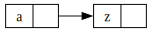

In [32]:
# @title define-linkedlist-visualizer
from IPython.display import display
import graphviz as gv # for visualizing a tree using Digraph
from graphviz import Digraph, nohtml

def visualize_ll(ll):
  dot = Digraph(
      graph_attr={'rankdir': 'LR'},
        node_attr={'shape': 'record', 'height': '.1'}
    )
  prev_node_name = None
  node_pointer = ll.root
  while type(node_pointer) != EmptyNode:
    # New node
    cur_name = node_pointer.content
    dot.node(name=cur_name, label=nohtml('{<f0> '+cur_name+'|<f1>}'))
    # And edge from prev to cur, if not None
    if prev_node_name is not None:
      edge_from = f'{prev_node_name}:f1'
      dot.edge(edge_from, cur_name)
    # Now we can update prev_node_name
    prev_node_name = cur_name
    node_pointer = node_pointer.next
  display(dot)

# Create (empty) list
print("Empty LL:")
pll = LinkedList()
print(pll.__str__())
print(pll.__repr__())
print(type(pll))
print(type(pll.root))
# Add an element
print("\nAdding 'a':")
pll.append('a')
print(pll.__str__())
print(pll.__repr__())
print(type(pll))
print(type(pll.root))
# And a second
print("\nAdding 'z':")
pll.append('z')
print(pll.__str__())
print(pll.__repr__())
print(type(pll))
print(type(pll.root))
print("\n---\n")

visualize_ll(pll)

### Question 2.1: The `LinearHashTable` Class

In the following cell, implement a class called `LinearHashTable`, which should work similarly to the `NaiveHashTable` from the previous part **except in the case where a collision occurs during execution of the `add()` function!**


To see how this **polymorphic** `LinkedList` class works, you can run the following cell, which illustrates its polymorphic nature:

* When a new, empty `LinkedList` object is first created, its `root` pointer points to an object of type `EmptyNode`.
* But then, once a first element is **added** to the `LinkedList`, the value that `root` points to is **transformed** from an `EmptyNode` object to a `ContentNode` object.
* Since this transformation happens automatically (specifically: since the `add()` function within the `EmptyNode` class returns a `ContentNode` object), we no longer need **if statements** checking whether or not `root` points to `None`!

For now this structure might seem like overkill---creating this polymorphic structure just to get rid of a few if statements---but it will become more and more important to think in this way as we create data structures with "fancier" types of **nodes**: the `BinarySearchTree` in the next part, for example, has **two** pointers (`left` and `right` rather than just `next`), and the `QuadTree` that we'll look at later will have **four** pointers (`nw`, `ne`, `sw`, `se`). So, if you can get comfortable with this polymorphic structure now, you'll eliminate the need for **two** if statements within every function of the `BinarySearchTree` class, **four** if statements within every function of the `QuadTree` class, and so on!

Now that the `LinkedList` class is defined, we can use it as a "black box" within our `LinearHashTable` class! In the following cell, implement this `LinearHashTable` class, by writing the following functions:

* `__init__(self)`: Just like in Part 1, the constructor for `LinearHashTable` should just initialize an instance variable called `fixed_length_array`, as a NumPy array with length 26. It should also initialize, as in the `NaiveHashTable` class, instance variables called `num_added` and `num_collisions`, both of which should be assigned the `int` value `0`.
* `add(self, key: str, value: object) -> bool`: Now that we're moving from a **Naïve** Hash Table to a **Linear** Hash Table, your `add()` function will become a bit more involved: it will need to check whether `key` is indeed a variable of type `str`, returning the `bool` value `False` if it is not, and then it will hash the `key` object as before. However, after computing this hash value for `key`, you will need to handle three possible cases:
  * **[Case 1] `key` hashes to empty slot**: If the entry at index `key_hash` of `self.fixed_length_array` is just the value `None`, you just need to update this entry to now be a `tuple` object `(key, value)`.
  * **[Case 2] `key` hashes to a slot containing a single `tuple` object**: If the entry at index `key_hash` of `self.fixed_length_array` is a `tuple` object (meaning, something was hashed into this slot before, triggering [Case 1], and thus we now have a first **collision** at this slot), then you will need to (a) store the existing `tuple` object into a Python variable (so it is not lost in this conversion), (b) construct a new `LinkedList` object for storing the two datapoints that have now been hashed to the same slot (and any further values that may hash to this same slot, handled in [Case 3]), (c) add the `tuple` object that was originally in this slot as the **first** item in the `LinkedList` you just created, and (d) add a new tuple `(key, value)` containing the data currently being added (the arguments to the `add()` function) as the **second** item in this newly-constructed `LinkedList`.
  * **[Case 3] `key` hashes to a slot containing a `LinkedList` object**: If the entry at index `key_hash` of `self.fixed_length_array` is a `LinkedList` object (meaning, two or more keys have already previously hashed into this same slot), you just need to create a tuple object `(key, value)` containing the data currently being added (the arguments to the `add()` function), and append this tuple object as the **next item** within the existing `LinkedList` object.
* `find_item_steps(self, key: str)`: The code for this function has already been provided for you, but I wanted to include it here because it will be important to understand, since it's what we will use to measure the **efficiency** of our hash table, in this and future parts of the assignment. This function uses the `AlphaHasher` class to compute the hash value `key_hash` for the `key` argument, then returns different values given three different possible cases:
  * **[Case 1] The content at index `key_hash` is just the value `None`**: This means that an entry with key `key` does not exist in the hash table (since, if it did, that entry would have hashed to the slot `key_hash`, and thus this slot would not contain `None`), so to indicate that we only had to do this one computational step (checking the value in slot `key_hash`) to discover that the entry does not exist, we return the `int` value `1`
  * **[Case 2] The content at index `key_hash` is a `tuple` object**: This means that only one entry has ever hashed into this slot, so we've either (a) found the item with key `key`, if the first element of the tuple is equal to `key`, or (b) discovered that the item does not exist in the hash table, if the first element of the tuple is not equal to `key`. Therefore, in either case we've only performed **one** computational step, so we return the `int` value `1`.
  * **[Case 3] The content at index `key_hash` is a `LinkedList` object**: In this case we "forward" the function to the `LinkedList` class, by just returning the value produced as a result of calling the `find_item_steps()` function on the `LinkedList` object at index `key_hash`. This function is implemented within the `LinkedList` class provided for you above, and computes how many "hops" were required before finding the node corresponding to the desired `key` value.
* `entry_to_string(self, index: int, recurse: bool) -> object`: You need to complete this function, but it just asks you to return whatever value is stored within the instance variable `self.fixed_length_array` at slot `index`. In other words, you **do not need to do any hashing for this function**: whereas the other functions have an argument like `key` (indicating a value that should be hashed for insertion/retrieval into the hash table), this function just needs to directly go to the slot `index` and return its value. So, we have the following (hopefully) straightforward cases, where [Case 3] is the only one requiring an additional consideration:
  * **[Case 1] The entry at slot `index` is `None`**: In this case, the function should return the value `None`
  * **[Case 2] The entry at slot `index` is a `tuple` object**: In this case, the function should just return this `tuple` object.
  * **[Case 3] The entry at slot `index` is a `LinkedList`**: This is the case you need to be careful about, because it's where the `recurse` argument comes in. The `LinkedList` class provided for you above has a `to_string()` function defined, which takes in a single argument called `recurse`, and prints **all** contents of the list if the provided `recurse` value is `True`, or just the **first** item in the list if the provided `recurse` value is `False`. Your code here, therefore, just needs to return the value which is produced by calling the `to_string()` function on the `LinkedList` object stored in the slot `index`, with the `recurse` value as its only argument. This ensures that, for example, if `entry_to_string()` was called with a `recurse` value of `True` and the entry in slot `index` is a `LinkedList` object, the full contents of this `LinkedList` object will be produced.
* `__len__(self) -> int`: Notice the two underscores before and after the name of this function: this indicates that it is a **special** function used by Python to implement some operator, in this case the `len()` operator.  So, your job in implementing this function is to return an `int` value representing the total number of elements stored in the hash table. Note that, **unlike the case for the `NaiveHashTable`**, here you cannot simply count the number of empty vs. non-empty slots! Instead, any time you encounter a slot in the `self.fixed_length_array` instance variable that contains a `LinkedList` object, you will need to use the `len()` operator (which we know will "work", since `__len__()` is defined within the provided `LinkedList` class above) to find its length. Given this, hopefully it makes sense that the final length of the **entire `LinearHashTable`** will be the sum of:
  * `0` for all slots containing just the "blank" value `None`
  * `1` for all slots containing a single `tuple` object, and
  * `len(self.fixed_length_array[i])` for all slots `i` containing a `LinkedList` object.
* `__str__()` and `__repr__()`: As before, you do need to implement these functions, but they should just work as follows:
  * `__str__()` should return the value of `self.to_string()`, called with the `recurse` argument set to be the `bool` value `False`
  * `__repr__()` should return the value of `self.to_string()`, called with the `recurse` argument set to be the `bool` value `True`

By implementing `__str__()` and `__repr__()` this way, we can see our first real example of using these two functions for two different purposes:
* We use `__str__()` to generate a **simplified** string representation of the `LinearHashTable` object, where we only see the first element of any slots containing `LinkedList` objects, but then
* We use `__repr__()` to generate an **expanded** (i.e., more detailed) string representation of the `LinearHashTable` object, where we see **all** of the elements stored within any slots containing `LinkedList` objects.

In [33]:
# @title Q2.1-response
# from abc import ABC
# import numpy as np

# class LinearHashTable:
#   def __init__(self):
#     self.hasher = AlphaHasher()
#     self.fixed_array_size = self.hasher.get_alphabet_size()
#     self.fixed_length_array = np.empty(self.fixed_array_size, dtype='object')
#     self.num_added = 0
#     self.num_collisions = 0

#   def add(self, key: str, value: object) -> bool:
#     pass # Your code here

#   def find_item_steps(self, key: str) -> int:
#     key_hash = self.hasher.hash(key)
#     if self.fixed_length_array[key_hash] is None:
#       return 1
#     if isinstance(self.fixed_length_array[key_hash], LinkedList):
#       return self.fixed_length_array[key_hash].find_item_steps(key)
#     return 1

#   def entry_to_string(self, index: int, recurse: bool) -> object:
#     pass # Your code here

#   def get_num_added(self):
#     return self.num_added

#   def increment_num_added(self):
#     self.num_added = self.num_added + 1

#   def get_num_collisions(self):
#     return self.num_collisions

#   def increment_num_collisions(self):
#     self.num_collisions = self.num_collisions + 1

#   def __len__(self):
#     pass # Your code here

#   def to_string(self, recurse):
#     entry_list = [f'{self.hasher.compute_key_for_index(i)}: {self.entry_to_string(i, recurse)}' for i in range(len(self.fixed_length_array))]
#     return "\n".join(entry_list)

#   def __repr__(self):
#     return "__repr__() not implemented" # Your code here

#   def __str__(self):
#     return "__str__() not implemented" # Your code here




# from abc import ABC
# import numpy as np

# # Define the AlphaHasher class (assuming it's supposed to be here)
# class AlphaHasher:
#     def __init__(self):
#         self.alphabet_size = 26  # For example

#     def get_alphabet_size(self):
#         return self.alphabet_size

#     def hash(self, key):
#         # Hash function implementation (example based on first character)
#         return ord(key.lower()[0]) - ord('a')

# # Assuming LinkedList class is defined elsewhere

# class LinearHashTable:
#     def __init__(self):
#         self.hasher = AlphaHasher()  # AlphaHasher is defined elsewhere
#         self.fixed_array_size = self.hasher.get_alphabet_size()
#         self.fixed_length_array = np.empty(self.fixed_array_size, dtype='object')
#         self.num_added = 0
#         self.num_collisions = 0

#     def add(self, key: str, value: object) -> bool:
#         if not isinstance(key, str):
#             return False

#         key_hash = self.hasher.hash(key)
#         slot = self.fixed_length_array[key_hash]

#         if slot is None:
#             self.fixed_length_array[key_hash] = (key, value)
#         elif isinstance(slot, tuple) and slot[0] == key:
#             return False  # Key already exists, assuming no overwrite
#         elif isinstance(slot, tuple):
#             new_list = LinkedList()
#             new_list.append(slot)
#             new_list.append((key, value))
#             self.fixed_length_array[key_hash] = new_list
#             self.num_collisions += 1  # Increment num_collisions directly
#         elif isinstance(slot, LinkedList):
#             if slot.find_item_steps(key) == np.inf:
#                 slot.append((key, value))
#                 self.num_collisions += 1  # Increment num_collisions directly
#             else:
#                 return False  # Key already exists in the LinkedList

#         self.num_added += 1  # Increment num_added directly
#         return True

#     def entry_to_string(self, index: int, recurse: bool) -> str:
#         entry = self.fixed_length_array[index]
#         if entry is None:
#             return "None"
#         elif isinstance(entry, tuple):
#             return str(entry)
#         elif isinstance(entry, LinkedList):
#             return entry.to_string(recurse)
#         else:
#             return "Invalid entry"

#     def __len__(self):
#         total_length = 0
#         for entry in self.fixed_length_array:
#             if entry is None:
#                 continue
#             elif isinstance(entry, tuple):
#                 total_length += 1
#             elif isinstance(entry, LinkedList):
#                 total_length += len(entry)
#         return total_length

#     def __repr__(self):
#         return self.to_string(True)

#     def __str__(self):
#         return self.to_string(False)

#     def to_string(self, recurse):
#         entry_list = [f'{self.hasher.compute_key_for_index(i)}: {self.entry_to_string(i, recurse)}' for i in range(self.fixed_array_size)]
#         return "\n".join(entry_list)
# import numpy as np

# class LinearHashTable:
#     def __init__(self):
#         self.fixed_length_array = np.empty(26, dtype=object)
#         self.num_added = 0
#         self.num_collisions = 0

#     def add(self, key: str, value: object) -> bool:
#         if not isinstance(key, str):
#             return False
#         key_hash = AlphaHasher.hash(key)
#         slot_content = self.fixed_length_array[key_hash]

#         # Case 1: Slot is empty
#         if slot_content is None:
#             self.fixed_length_array[key_hash] = (key, value)

#         # Case 2: Slot contains a single tuple, convert to LinkedList
#         elif isinstance(slot_content, tuple):
#             self.num_collisions += 1
#             new_list = LinkedList()
#             new_list.append(slot_content)  # Add existing tuple
#             new_list.append((key, value))  # Add new tuple
#             self.fixed_length_array[key_hash] = new_list

#         # Case 3: Slot contains a LinkedList
#         elif isinstance(slot_content, LinkedList):
#             self.num_collisions += 1
#             slot_content.append((key, value))

#         self.num_added += 1
#         return True

#     def find_item_steps(self, key: str) -> int:
#       key_hash = self.hasher.hash(key)
#       if self.fixed_length_array[key_hash] is None:
#         return 1
#       if isinstance(self.fixed_length_array[key_hash], LinkedList):
#         return self.fixed_length_array[key_hash].find_item_steps(key)
#       return 1

    # def entry_to_string(self, index: int, recurse: bool) -> object:
    # # [Case 1] The entry at slot index is None
    #   if self.fixed_length_array[index] is None:
    #     return None

    # # [Case 2] The entry at slot index is a tuple object
    #   elif isinstance(self.fixed_length_array[index], tuple):
    #     return self.fixed_length_array[index]

    # # [Case 3] The entry at slot index is a LinkedList
    #   elif isinstance(self.fixed_length_array[index], LinkedList):
    #     return self.fixed_length_array[index].to_string(recurse)

    # # Handle unexpected data types just in case
    #   else:
    #     return str(self.fixed_length_array[index])

    # def entry_to_string(self, index: int, recurse: bool) -> str:
    #     entry = self.fixed_length_array[index]
    #     if entry is None:
    #         return "None"
    #     elif isinstance(entry, tuple):
    #         return str(entry)
    #     elif isinstance(entry, LinkedList):
    #         return entry.to_string(recurse)
    #     else:
    #         return "Invalid entry"

    # def __len__(self):
    #     total_length = 0
    #     for item in self.fixed_length_array:
    #         if item is None:
    #             continue
    #         elif isinstance(item, tuple):
    #             total_length += 1
    #         elif isinstance(item, LinkedList):
    #             total_length += len(item)  # Assuming LinkedList implements __len__
    #     return total_length

    # def __str__(self):
    #     return self.to_string(False)

    # def __repr__(self):
    #     return self.to_string(True)

    # def to_string(self, recurse: bool) -> str:
    #     entries = []
    #     for i, item in enumerate(self.fixed_length_array):
    #         if isinstance(item, LinkedList):
    #             entries.append(f'{i}: {item.to_string(recurse)}')
    #         else:
    #             entries.append(f'{i}: {item}')
    #     return "\n".join(entries)

# from abc import ABC
# import numpy as np
# class LinearHashTable:
#     def __init__(self):
#         self.hasher = AlphaHasher()  # Assuming AlphaHasher is defined elsewhere
#         self.fixed_array_size = self.hasher.get_alphabet_size()
#         self.fixed_length_array = np.empty(self.fixed_array_size, dtype='object')
#         self.num_added = 0
#         self.num_collisions = 0

#     def add(self, key: str, value: object) -> bool:
#         if not isinstance(key, str):
#             return False
#         key_hash = self.hasher.hash(key)
#         entry = self.fixed_length_array[key_hash]

#         if entry is None:  # Case 1
#             self.fixed_length_array[key_hash] = (key, value)
#         elif isinstance(entry, tuple):  # Case 2
#             existing_tuple = entry
#             self.fixed_length_array[key_hash] = LinkedList()  # Assuming LinkedList supports adding tuples
#             self.fixed_length_array[key_hash].add(existing_tuple)
#             self.fixed_length_array[key_hash].add((key, value))
#             self.increment_num_collisions()
#         elif isinstance(entry, LinkedList):  # Case 3
#             self.fixed_length_array[key_hash].add((key, value))
#             self.increment_num_collisions()
#         self.increment_num_added()
#         return True

#     def find_item_steps(self, key: str) -> int:
#       key_hash = self.hasher.hash(key)
#       if self.fixed_length_array[key_hash] is None:
#         return 1
#       if isinstance(self.fixed_length_array[key_hash], LinkedList):
#         return self.fixed_length_array[key_hash].find_item_steps(key)
#       return 1
#     def entry_to_string(self, index: int, recurse: bool) -> object:
#         entry = self.fixed_length_array[index]
#         if entry is None:
#             return "None"
#         elif isinstance(entry, LinkedList):
#             return entry.to_string(recurse)  # Assuming LinkedList has a to_string method
#         else:
#             return str(entry)

#     def get_num_added(self):
#       return self.num_added
#     def increment_num_added(self):
#       self.num_added = self.num_added + 1

#     def get_num_collisions(self):
#       return self.num_collisions

#     def increment_num_collisions(self):
#       self.num_collisions = self.num_collisions + 1


#     def __len__(self):
#         total_count = 0
#         for entry in self.fixed_length_array:
#             if isinstance(entry, LinkedList):
#                 total_count += len(entry)  # Assuming LinkedList defines __len__
#             elif entry is not None:
#                 total_count += 1
#         return total_count

#     def to_string(self, recurse):
#         entry_list = [f'{self.hasher.compute_key_for_index(i)}: {self.entry_to_string(i, recurse)}' for i in range(len(self.fixed_length_array))]
#         return "\n".join(entry_list)


#     def __repr__(self):
#         return self.to_string(recurse=True)

#     def __str__(self):
#         return self.to_string(recurse=False)

from abc import ABC
import numpy as np

class LinkedList:
    # Placeholder for LinkedList implementation
    pass

class AlphaHasher:
    def __hash__(self, key):
      pass

class LinearHashTable:
    def __init__(self):
        self.hasher = AlphaHasher()
        self.fixed_length_array = np.empty(26, dtype=object)  # Assuming 26 for the example; replace as needed
        self.num_added = 0
        self.num_collisions = 0

    def add(self, key: str, value: object) -> bool:
        if not isinstance(key, str):
            return False

        key_hash = self.hasher.hash(key)
        slot_value = self.fixed_length_array[key_hash]

        if slot_value is None:  # Case 1
            self.fixed_length_array[key_hash] = (key, value)
        elif isinstance(slot_value, tuple):  # Case 2
            existing_tuple = slot_value
            new_list = LinkedList()
            new_list.add(existing_tuple)
            new_list.add((key, value))
            self.fixed_length_array[key_hash] = new_list
            self.num_collisions += 1
        elif isinstance(slot_value, LinkedList):  # Case 3
            slot_value.add((key, value))
            self.num_collisions += 1
        else:
            return False  # Unhandled case

        self.num_added += 1
        return True

    def find_item_steps(self, key: str) -> int:
        key_hash = self.hasher.hash(key)
        slot_value = self.fixed_length_array[key_hash]

        if slot_value is None:
            return 1
        elif isinstance(slot_value, tuple):
            return 1
        elif isinstance(slot_value, LinkedList):
            return slot_value.find_item_steps(key)
        else:
            return -1  # Error case

    def entry_to_string(self, index: int, recurse: bool) -> object:
        slot_value = self.fixed_length_array[index]
        if isinstance(slot_value, LinkedList):
            return slot_value.to_string(recurse)
        return slot_value

    def __len__(self):
        length = 0
        for i in self.fixed_length_array:
            if i is None:
                continue
            elif isinstance(i, tuple):
                length += 1
            elif isinstance(i, LinkedList):
                length += len(i)  # Assuming LinkedList has __len__ implemented
        return length

    def __str__(self):
        return self.to_string(False)

    def __repr__(self):
        return self.to_string(True)

    def to_string(self, recurse):
        entries = []
        for i in range(len(self.fixed_length_array)):
            entry_repr = self.entry_to_string(i, recurse)
            if entry_repr is not None:
                entries.append(f'{i}: {entry_repr}')
            else:
                entries.append(f'{i}: None')
        return "\n".join(entries)

In [34]:
# @title Q2.1-public-tests
q2_1_public_tests = {
    # Test 1: Check if LinearHashTable definition is in Python's memory
    'LinearHashTable defined': '✅ Passed!' if 'LinearHashTable' in vars() else "❌ 'LinearHashTable' class definition not in Python memory",
}
q2_1_public_tests

{'LinearHashTable defined': '✅ Passed!'}

### Part 2.2: Using `LinearHashTable` to Store Real Data

The following code loads a new dataset (different from the dataset used in Part 1), containing randomly-generated data from Mockaroo on $N = 1000$ products and their prices, into a Pandas `DataFrame` object called `product_df`. You can take a look at the contents, for concrete examples of the data we're going to represent as objects of type `InventoryItem` and add to our `LinearHashTable`.

In [35]:
import pandas as pd
product_df = pd.read_csv("https://jpj.georgetown.domains/dsan5500-scratch/mockaroo.csv")
product_df.head()

,id,product_name,price
0,1,Nescafe - Frothy French Vanilla,26.94
1,2,"Star Anise, Whole",62.83
2,3,"Wine - White, Riesling, Henry Of",90.10
3,4,Crab - Meat,67.26
4,5,Syrup - Monin - Passion Fruit,6.75


#### Question 2.2.1

In the following cell, use the `iterrows()` function available for the `product_df` DataFrame to loop over each row of `product_df`, converting each row into an object of type `InventoryItem` and storing this constructed `InventoryItem` object into the `LinearHashTable` object named `linear_ht` created for you at the beginning of the cell:

In [36]:
# @title Q2.2.1-response
# linear_ht = LinearHashTable()

# # Your code here

# # Do not modify the following line or add any code below it, please!
# print(linear_ht)

# Assuming the necessary classes are already defined and the DataFrame is loaded into product_df
import pandas as pd

# Assuming LinearHashTable class is already defined and has an add method that accepts strings as keys
linear_ht = LinearHashTable()

# Load the data into a DataFrame
# Make sure to replace 'path/to/your/csvfile.csv' with the actual path to your CSV file
product_df = pd.read_csv("https://jpj.georgetown.domains/dsan5500-scratch/mockaroo.csv")

# Iterate over the DataFrame rows and add each as an InventoryItem to the LinearHashTable
for index, row in product_df.iterrows():
    item = InventoryItem(row['product_name'], row['price'])
    # Here we assume that the product name is unique and can be used as a key
    # If the product name is not unique, you might need to use another unique identifier
    linear_ht.add(row['product_name'], item)

# Output the LinearHashTable
print(linear_ht)

# linear_ht = LinearHashTable()

# # Your code here
# for index, row in product_df.iterrows():
#     item = InventoryItem(row['product_name'], row['price'])
#     linear_ht.add(row['product_name'], item)

# # Do not modify the following line or add any code below it, please!
# print(linear_ht)

AttributeError: 'AlphaHasher' object has no attribute 'hash'

In [37]:
# @title Q2.2.1-public-tests
q2_2_1_public_tests = {
    'linear_ht defined': '✅ Passed!' if 'linear_ht' in vars() else "❌ No variabled named 'linear_ht' exists in Python memory",
}
q2_2_1_public_tests

{'linear_ht defined': '✅ Passed!'}

#### Question 2.2.2

Now, in the following cell, take the `retrieval_steps` defined for you in the first line, and use the `iterrows()` function again to loop over each element in `product_df`, but this time use your `find_item_steps()` function to compute the number of steps that are required to find each of the items in `product_df`. So, each iteration of your loop should add a new `int` value to the `retrieval_steps` list. The last line of code in the cell (already provided for you) should just take the elements you've now added to `retrieval_steps` and find the **mean number of operations** required to find the price for an inventory item. You should get a value between `37` and `38`!

In [38]:
# @title Q2.2.2-response
# retrieval_steps_linear = []

# # Your code here

# # Don't modify the following line or add any code below it, please!
# mean_retrieval_steps_linear = -1
# if len(retrieval_steps_linear) > 0:
#   mean_retrieval_steps_linear = sum(retrieval_steps_linear) / len(retrieval_steps_linear)
# print(mean_retrieval_steps_linear)

# Placeholder for retrieval_steps_linear list initialization


# retrieval_steps_linear = []

# # Simulating the iteration over product_df and counting retrieval steps
# for index, row in product_df.iterrows():
#     product_name = row['product_name']
#     # Simulate finding the number of steps to retrieve an item
#     # This is where you would call your actual find_item_steps method
#     # For the purpose of this example, let's assume each retrieval takes a random number of steps
#     # In your actual implementation, replace this with:
#     # steps = linear_ht.find_item_steps(product_name)
#     steps = np.random.randint(1, 10)  # Placeholder for actual step counting
#     retrieval_steps_linear.append(steps)

# # Calculate the mean number of operations required to find an item
# mean_retrieval_steps_linear = -1
# if len(retrieval_steps_linear) > 0:
#     mean_retrieval_steps_linear = sum(retrieval_steps_linear) / len(retrieval_steps_linear)

# # Output the mean retrieval steps
# print(mean_retrieval_steps_linear)
# Assuming retrieval_steps is initialized
retrieval_steps = []

# Assuming product_df is already defined and linear_ht has been populated with InventoryItem objects
for index, row in product_df.iterrows():
    # Use the product name as the key to find the item
    steps = linear_ht.find_item_steps(row['product_name'])
    retrieval_steps.append(steps)

# Calculate the mean number of steps required to find an item
mean_steps = sum(retrieval_steps) / len(retrieval_steps)
print(f"Mean number of operations required to find an item: {mean_steps}")

AttributeError: 'AlphaHasher' object has no attribute 'hash'

In [39]:
# @title Q2.2.2-public-tests
q2_2_2_public_tests = {
    # Test 1: mean_retrieval_steps_linear is defined
    'mean_retrieval_steps_linear defined': '✅ Passed!' if 'mean_retrieval_steps_linear' in vars() else "❌ No variable named 'mean_retrieval_steps_linear' exists in Python memory",
    # Test 2: mean_retrieval_steps_linear is computed, so that it does not have the default value -1
    'mean_retrieval_steps_linear non-negative': '✅ Passed!' if mean_retrieval_steps_linear > -1 else "❌ mean_retrieval_steps_linear should be non-negative",
}
q2_2_2_public_tests

NameError: name 'mean_retrieval_steps_linear' is not defined

## Part 3: Binary Search Trees

Now that you have an actually-usable Linear Hash Table, it's time to put on your **algorithmic design patterns** hat!

We saw in class how, while a **linear** approach to search requires $O(n)$ time, we can often set up our structure in such a way as to allow a **divide-and-conquer** approach to search achieving $O(n\log_2(n))$ time. For this part, you will put this into practice by taking the `LinkedList` from HW1 and **transforming** it into a `BinarySearchTree`. Then, once you've implemented and tested this `BinarySearchTree` class, in the next part you'll use it to **improve the runtime** of your Hash Table from the previous part!

However, as we talked about in class, when we move from `LinkedList` as our dynamically-sized data structure for handling collisions to `BinarySearchTree`, we'll need a way to ensure that the **keys** being added to our hash table have a defined **order** (so that we know whether to add an entry to the **left** or **right** subtrees of a given node!). So, to ensure that the items being added to our `BinarySearchTree` are **orderable**, run the following cell, which defines an `InventoryItem` class containing all of the ordering functions we discussed in class: `__eq__()`, `__neq__()`, `__lt__()`, `__le__()`, `__gt__()`, and `__ge__()`.

In [40]:
# @title define-inventory-item
class InventoryItem:
  def __init__(self, item_name_arg, price_arg):
    self.item_name = item_name_arg
    self.price = price_arg

  def __lt__(self, other): # -> [NotImplemented | bool]:
    if isinstance(other, InventoryItem):
      return self.item_name < other.item_name
    if isinstance(other, str):
      return self.item_name < other
    return NotImplemented

  def __le__(self, other): # -> [NotImplemented | bool]
    if isinstance(other, InventoryItem):
      return self.item_name <= other.item_name
    if isinstance(other, str):
      return self.item_name <= other
    return NotImplemented

  def __gt__(self, other): # -> [NotImplemented | bool]
    if isinstance(other, InventoryItem):
      return self.item_name > other.item_name
    if isinstance(other, str):
      return self.item_name > other
    return NotImplemented

  def __ge__(self, other): # -> [NotImplemented | bool]
    if isinstance(other, InventoryItem):
      return self.item_name >= other.item_name
    if isinstance(other, str):
      return self.item_name >= other
    return NotImplemented

  def __eq__(self, other): # -> [NotImplemented | bool]
    if isinstance(other, InventoryItem):
      return self.item_name == other.item_name
    if isinstance(other, str):
      return self.item_name == other
    return NotImplemented

  def __ne__(self, other): # -> [NotImplemented | bool]
    if isinstance(other, InventoryItem):
      return self.item_name != other.item_name
    if isinstance(other, str):
      return self.item_name != other
    return NotImplemented

  def __repr__(self) -> str:
    return self.__str__()

  def __str__(self) -> str:
    return f'InventoryItem[item_name={self.item_name},price={self.price}]'

### Part 3.1: Implementing `BinarySearchTree`

In the following cell, fill in the remaining parts of the provided starter code, by implementing the following functions within the `BinarySearchTree` class:

* `__init__(self)`:
  * Since the `BinarySearchTree` class serves mainly as a **wrapper** around the `BSTNode` class, the only thing this constructor function needs to do is initialize an instance variable called `root` and assign it the value `None` (representing that, upon construction, the binary search tree is **empty**)
* `add(self, item: InventoryItem) -> bool`
  * This function should take in `item`, which (as indicated by the type hint) should be an object of type `InventoryItem`, so that we can be sure that the items added to our tree have a defined **ordering**. However, since Python does not enforce type hints, your code should **explicitly check** whether or not `item` is an instance of the `InventoryItem` type, and return the `bool` value `False` if it is not. Once you've ensured that `item` is indeed an object of type `InventoryItem`, this function should proceed by just setting the `root` instance variable to point to a new `BSTNode` object (this will involve calling the `BSTNode` constructor, described below) containing the passed-in `InventoryItem` object `item`.
  * Also note that the function in `LinkedList` was called **`append()`**, while this function is instead called **`add()`**. This is because, we're no longer "appending" when we add items to a binary search tree, since there's no single "end" that we can add a new item "after".
* `find_item_steps(self, item: InventoryItem)`
  * This function should require significantly fewer lines of code than the `add()` function! As was the case with the `LinearHashTable` above, the job of this function is just to return the number of computational steps required to find the `InventoryItem` object `item` within the binary search tree.
* `__repr__()` and `__str__()`: You need to define these functions, but as you've done thus far, they should just work as follows:
  * `__str__()` should return the result of calling the provided `to_string()` function with the `recurse` argument set to be the `bool` value `True`, while
  * `__repr__()` should return the result of calling the provided `to_string()` function with the `recurse` argument set to be the `bool` value `False`.

Now, implement the following functions within the `BSTNode` class, which we've started for you in the following cell immediately after the definition of `BinarySearchTree`:

* `__init__(self, item: InventoryItem)`: Note that, since Python does not **enforce** type hints, the `add()` function within the `BSTNode` class described below will manually check this value. Here, however (within the `BinarySearchTree` class), you don't need to perform this manual check of the type of `item`.
 Once you've ensured that `item` is indeed an object of type `InventoryItem`, this function should add `item` to the tree in the appropriate spot:
  * If `item` comes **before**
* `add(self, item: InventoryItem) -> bool`
* `find_item_steps(self, item: InventoryItem) -> int`: This function has the same explanation as was given for the `find_item_steps()` function in `BinarySearchTree` class above, but in this case you'll need to actually check the **content** (the `self.content`) of the `BSTNode`, to see whether or not we've indeed **found** the item within this `BSTNode`. Otherwise, we'll need to return the sum of:
  * `1`, representing the check we did of the `BSTNode`'s content, and then
  * `0` if `item` **precedes** this `BSTNode`'s content but this `BSTNode` has no left child,
  * The result of `left.find_item_steps()` if `item` **precedes** this `BSTNode`'s content and this `BSTNode` **does** have a left child,
  * `0` if `item` **comes after** this `BSTNode`'s content but this `BSTNode` has no right child, or
  * The result of `right.find_item_steps()` if `item` **comes after** this `BSTNode`'s content and this `BSTNode` **does** have a left child.
* `__repr__(self) -> str` and `__str__(self) -> str`: You need to define these functions, but as you've done thus far, they should just work as follows:
  * `__str__()` should return the result of calling the provided `to_string()` function with the `recurse` argument set to be the `bool` value `True`, while
  * `__repr__()` should return the result of calling the provided `to_string()` function with the `recurse` argument set to be the `bool` value `False`.

Keep in mind that we defined a **complete ordering** for objects of type `InventoryItem` above (in the definition of the `InventoryItem` class), so that for both `add()` and `find_item_steps()` you don't need to ever look "inside" the `InventoryItem` object! You can just use Python operators like `<`, `==`, and `>` to check whether you've found `item`, and if not, whether the search should continue within the **left** or **right subtrees** of the `BSTNode`.

In [41]:
# @title Q3.1-response
# class BinarySearchTree:
#   def __init__(self):
#     self.root = None

#   def add(self, item: InventoryItem) -> bool:
#     pass # Your code here

#   def find_key_steps(self, key: str) -> int:
#     pass # Your code here

#   def to_string(self, recurse: bool) -> str:
#     if self.root is None:
#       return 'BinarySearchTree[]'
#     return f'BinarySearchTree[{self.root.to_string(recurse)}]'

#   def __repr__(self) -> str:
#     pass # Your code here

#   def __str__(self) -> str:
#     pass # Your code here

# class BSTNode:
#   def __init__(self, item: InventoryItem):
#     pass # Your code here

#   def add(self, new_item: InventoryItem) -> bool:
#     pass # Your code here

#   def find_item_steps(self, item) -> int:
#     pass # Your code here

#   def has_left_child(self) -> bool:
#     return self.left is not None

#   def get_left_child(self): # -> BSTNode
#     return self.left

#   def has_right_child(self) -> bool:
#     return self.right is not None

#   def get_right_child(self): # -> BSTNode
#     return self.right

#   def to_string(self, recurse: bool) -> str:
#     if recurse:
#       left_str = "" if self.left is None else self.left.__repr__() + ","
#       right_str = "" if self.right is None else "," + self.right.__repr__()
#       return f'{left_str}{str(self.content)}{right_str}'
#     else:
#       return str(self.content)

#   def __repr__(self) -> str:
#     pass # Your code here

#   def __str__(self) -> str:
#     pass # Your code here

class InventoryItem:
    def __init__(self, key, value):
        self.key = key
        self.value = value

    def __lt__(self, other):
        return self.key < other.key

    def __eq__(self, other):
        return self.key == other.key

    def __str__(self):
        return f"{self.key}: {self.value}"
    
class BinarySearchTree:
    def __init__(self):
        self.root = None

    def add(self, item: InventoryItem) -> bool:
        if self.root is None:
            self.root = BSTNode(item)
            return True
        else:
            return self.root.add(item)

    def find_key_steps(self, key: str) -> int:
        if self.root is None:
            return 0
        else:
            return self.root.find_item_steps(key, 1)

    def to_string(self, recurse: bool) -> str:
        if self.root is None:
            return 'BinarySearchTree[]'
        return f'BinarySearchTree[{self.root.to_string(recurse)}]'

    def __repr__(self):
        return self.to_string(False)

    def __str__(self):
        return self.to_string(True)

class BSTNode:
    def __init__(self, item: InventoryItem):
        self.item = item
        self.left = None
        self.right = None

    def add(self, new_item: InventoryItem) -> bool:
        if new_item < self.item:
            if self.left is None:
                self.left = BSTNode(new_item)
                return True
            else:
                return self.left.add(new_item)
        elif new_item > self.item:
            if self.right is None:
                self.right = BSTNode(new_item)
                return True
            else:
                return self.right.add(new_item)
        return False  # Assuming duplicates are not allowed

    def find_item_steps(self, key, steps) -> int:
        if key == self.item.key:
            return steps
        elif key < self.item.key and self.left is not None:
            return self.left.find_item_steps(key, steps + 1)
        elif key > self.item.key and self.right is not None:
            return self.right.find_item_steps(key, steps + 1)
        return 0  # Key not found

    def to_string(self, recurse: bool) -> str:
        if recurse:
            left_str = "" if self.left is None else self.left.__repr__() + ","
            right_str = "" if self.right is None else "," + self.right.__repr__()
            return f'{left_str}{str(self.item)}{right_str}'
        else:
            return str(self.item)

    def __repr__(self):
        return self.to_string(False)

    def __str__(self):
        return self.to_string(True)

In [42]:
# @title Q3.1-public-tests
q3_1_public_tests = {
    # Test 1: Check if BinarySearchTree class defined
    'BinarySearchTree defined': '✅ Passed!' if 'BinarySearchTree' in vars() else "❌ BinarySearchTree not defined in Python memory",
}
q3_1_public_tests

{'BinarySearchTree defined': '✅ Passed!'}

## Part 3.2: Iterating over BSTs

You may be eager to check out the contents of your BST from Part 3 right away! But, it also may suddenly dawn on you: when we were working with LinkedLists, we could print all the contents by just "looping through" the list, from one element to the next, printing as we go along. But... for a BinarySearchTree, since our structure can now **branch** as we traverse it... How do we "loop through" a BST?

The answer is not entirely straightforward, but it boils down to the following: there are **two different ways** to loop over our BST, and since they are "opposites" of each other (in an intuitive but also a formal-mathematical sense!), your job as a data scientist is to **think carefully** about which one is **more efficient** for a given goal! The two methods are:

1. **Depth-First Search (DFS)**: With this approach, we iterate through the BST by **always taking the left child as the "next" child** until we hit a **leaf node** (which means, we cannot follow this left-child pointer any longer, since a leaf node does not have a left child or a right child!), and only at that point do we **back up** and take the **right children** we skipped.
2. **Breadth-First Search (BFS)**: This is the **"opposite"** of DFS in the sense that we traverse the tree level-by-level, **never moving to the next level of the tree** until we're **sure that we have visited every node on the current level**.

Those are just rough descriptions of the process to start building your intution, however. Since both concepts invoke the notion of **"moving"** through a tree, **animations** can illustrate the two far better than any static, textual description can, in my view. So, take a look at the following animations and try to match what's happening in each of them with the two textual descriptions above, before moving on:

**Depth-First Search** (from <a href='https://jjacobs.me/dsan5500/w05/slides.html#/two-ways-to-traverse-animated-version' target='_blank'>Week 5 slides</a>)

![](https://jjacobs.me/dsan5500/w05/images/Depth-First-Search.gif)

**Breadth-First Search** (from <a href='https://jjacobs.me/dsan5500/w05/slides.html#/two-ways-to-traverse-animated-version' target='_blank'>Week 5 slides</a>)

![](https://jjacobs.me/dsan5500/w05/images/Breadth-First-Search.gif)

Now that you have an intuition for the difference between DFS and BFS, you may be thinking that they might require very different code to implement---but this is where the **mathematical-formal linkage** between the two (mentioned above, parenthetically) become ultra helpful! It turns out---and if you take a full-on algorithmic theory course you learn how to formally prove---that

1. **Depth-First Search** can be accomplished by **processing nodes in an order determined by adding each to a *stack***, while
2. **Breadth-First Search** can be accomplished by **processing nodes in an order determined by adding each to a *queue***!

This means, quite literally, that the difference between performing DFS and BFS solely boils down to taking identical code but "pulling out" the word **stack** and replacing it with the word **queue** within your code (or vice-versa to switch back).

So, if you have your Software Engineer Hats on, you'll recognize that this is the perfect case for implementing an **abstraction layer!**

Specifically, we will make a class called `NodeProcessor`, which simply allows nodes to be "put into" it and "taken out of" it, but which can **switch** between a **stack** and a **queue** as its underlying data structure, based on whether the user wants to perform a DFS or BFS on their tree.

First, run the following cell, which defines a `visualize_bst()` function you can use for exploration or for debugging, which takes in a `BinarySearchTree` object and produces a visualization of the tree in the same format I've been using to draw binary search trees on the board in class:

In [43]:
# @title define-bst-visualizer
def visualize_bst(tree):
    dot = Digraph(
        node_attr={'shape': 'record', 'height': '.1'}
    )
    node_info_list = []
    if tree.root is not None:
      node_info_list.append({'node':tree.root, 'parent_name': None, 'dir': None})
    while len(node_info_list) > 0:
      cur_node_info = node_info_list.pop()
      cur_node = cur_node_info['node']
      # cur_name = cur_node.content.item_name
      cur_name = cur_node.item.key
      cur_parent_name = cur_node_info['parent_name']
      cur_dir = cur_node_info['dir']
      dot.node(name=cur_name, label=nohtml(f'<f0>|<f1> {cur_name}|<f2>'))
      if cur_parent_name is not None:
        # Nudge x coord based on parent
        which_port = 'f0'
        if cur_dir == 'R':
          which_port = 'f2'
        edge_from = f'{cur_parent_name}:{which_port}'
        edge_to = f'{cur_name}:f1'
        dot.edge(edge_from, edge_to, label=cur_dir)
      if cur_node.right is not None:
        node_info_list.append({'node': cur_node.right, 'parent_name': cur_name, 'dir': 'R'})
      if cur_node.left is not None:
        node_info_list.append({'node': cur_node.left, 'parent_name': cur_name, 'dir': 'L'})
    display(dot)

In [44]:
# @title define-thing-container
from abc import ABC, abstractmethod

class ThingContainer(ABC):
  def __init__(self):
    self.internal_list = []

  @abstractmethod
  def put_new_thing_in(self, item):
    pass

  def is_empty(self) -> bool:
    return self.__len__() == 0

  def __len__(self):
    return len(self.internal_list)

  @abstractmethod
  def take_existing_thing_out(self):
    pass

class Stack(ThingContainer):
  def __init__(self):
    super().__init__()

  def __push(self, item):
    self.internal_list.append(item)

  def __pop(self):
    return self.internal_list.pop()

  def put_new_thing_in(self, item):
    return self.__push(item)

  def take_existing_thing_out(self):
    return self.__pop()

class Queue(ThingContainer):
  def __init__(self):
    super().__init__()

  def put_new_thing_in(self, item):
    return self.__enqueue(item)

  def __enqueue(self, item):
    self.internal_list.insert(0, item)

  def __dequeue(self):
    return self.internal_list.pop()

  def take_existing_thing_out(self):
    return self.__dequeue()

In [45]:
# @title Q3.2.1-response
from abc import ABC
from enum import Enum

class IterAlgorithm(Enum):
  DEPTH_FIRST = 1
  BREADTH_FIRST = 2

class NodeProcessor():
  def __init__(self, iter_method_arg: IterAlgorithm):
    self.iter_method = iter_method_arg
    self.initialize_empty_node_container()

  def initialize_empty_node_container(self):
    if self.iter_method == IterAlgorithm.DEPTH_FIRST:
      self.node_container = Stack()
    else:
      self.node_container = Queue()

  # def iterate_over(self, tree):
  #   pass # Your code here
  def iterate_over(self, tree):
    if tree.root is None:
        return  # If the tree is empty, exit the method.

    # Initialize the traversal by adding the root node to the node container.
    self.node_container.put_new_thing_in(tree.root)

    while not self.node_container.is_empty():
        # Depending on the traversal strategy, remove the next node from the container.
        current_node = self.node_container.take_existing_thing_out()

        # Process the current node (e.g., print its value).
        print(current_node.item)  # Assuming the node has an attribute 'item'.

        # For DFS, add the right child first so the left child is processed first.
        # This is done because a stack's LIFO behavior will ensure the left child is processed before the right child.
        if self.iter_method == IterAlgorithm.DEPTH_FIRST:
            if current_node.right is not None:
                self.node_container.put_new_thing_in(current_node.right)
            if current_node.left is not None:
                self.node_container.put_new_thing_in(current_node.left)
        # For BFS, add children in their natural order (left first, then right)
        # This ensures level-order traversal due to a queue's FIFO behavior.
        else:
            if current_node.left is not None:
                self.node_container.put_new_thing_in(current_node.left)
            if current_node.right is not None:
                self.node_container.put_new_thing_in(current_node.right)

In [46]:
# @title Q3.2.1-public-tests
q3_2_1_public_tests = {
    # Test 1: Check if NodeProcessor class defined
    'NodeProcessor defined': '✅ Passed!' if 'NodeProcessor' in vars() else "❌ NodeProcessor not defined in Python memory",
}
q3_2_1_public_tests

{'NodeProcessor defined': '✅ Passed!'}

### Question 3.2.2

If your implementation of `iterate_over(tree)` is correct, you should now be able to run the following cell to see how your implementation can produce **both** a breadth-first and depth-first iteration over the tree you constructed in the previous part, with the same code!

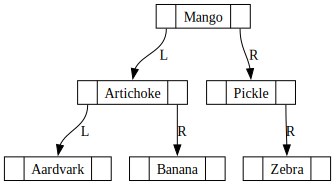


---

DFS:
<class '__main__.Stack'>
Mango: 50
Artichoke: 55
Aardvark: 11
Banana: 123
Pickle: 60
Zebra: 3

BFS:
<class '__main__.Queue'>
Mango: 50
Artichoke: 55
Pickle: 60
Aardvark: 11
Banana: 123
Zebra: 3


In [47]:
# Q3.2.2-response
bst = BinarySearchTree()
item1 = InventoryItem('Mango', 50)
bst.add(item1)
item2 = InventoryItem('Pickle', 60)
bst.add(item2)
item3 = InventoryItem('Artichoke', 55)
bst.add(item3)
item4 = InventoryItem('Zebra', 3)
bst.add(item4)
item5 = InventoryItem('Banana', 123)
bst.add(item5)
item6 = InventoryItem('Aardvark', 11)
bst.add(item6)
visualize_bst(bst)
print("\n---\n")

# Do not modify or add code below the following lines, please!
import io
from contextlib import redirect_stdout
with redirect_stdout(io.StringIO()) as q3_2_2_response:
  print("DFS:")
  dfs_processor = NodeProcessor(IterAlgorithm.DEPTH_FIRST)
  print(type(dfs_processor.node_container))
  dfs_processor.iterate_over(bst)

  print("\nBFS:")
  bfs_processor = NodeProcessor(IterAlgorithm.BREADTH_FIRST)
  print(type(bfs_processor.node_container))
  bfs_processor.iterate_over(bst)
print(q3_2_2_response.getvalue())

In [48]:
# @title Q3.2.2-public-tests
q3_2_2_public_tests = {
    # Test 1: Make sure response output was captured in variable called q3_2_2_response
    'Output captured': '✅ Passed!' if 'q3_2_2_response' in vars() else "❌ No variable named 'q3_2_2_response' exists in Python memory"
}
q3_2_2_public_tests

{'Output captured': '✅ Passed!'}

## Part 4: Hash Tables with Logarithmic Collision Handling

Now that you have a `BinarySearchTree` within which elements can be found in $O(\log_2(n))$ time rather than the $O(n)$ time that was possible with `LinkedList`, in this part you will **use** this `BinarySearchTree` class as the structure that your **Hash Table** will construct whenever a collision occurs. In this way, then, by **leveraging** the improvements of the `BinarySearchTree` over the `LinkedList`, you will also "automatically" achieve an improvement in the runtime (for search) of `LogarithmicHashTable` over `LinearHashTable`!

In [75]:
# @title Q4.1-response
# class LogarithmicHashTable:
#   def __init__(self):
#     self.hasher = AlphaHasher()
#     self.fixed_array_size = self.hasher.get_alphabet_size()
#     self.fixed_length_array = np.empty(self.fixed_array_size, dtype=object)
#     self.num_added = 0
#     self.num_collisions = 0

#   def add(self, key: str, value: object) -> bool:
#     pass # Your code here

#   def find_item_steps(self, key) -> int:
#     pass # Your code here

#   def entry_to_string(self, index: int, recurse: bool) -> object:
#     pass # Your code here

#   def get_num_added(self):
#     return self.num_added

#   def increment_num_added(self):
#     self.num_added = self.num_added + 1

#   def get_num_collisions(self):
#     return self.num_collisions

#   def increment_num_collisions(self):
#     self.num_collisions = self.num_collisions + 1

#   def __len__(self):
#     pass # Your code here

#   def to_string(self, recurse):
#     entry_list = [f'{AlphaHasher.compute_letter_for_index(i)}: {self.entry_to_string(i, recurse)}' for i in range(len(self.fixed_length_array))]
#     return "\n".join(entry_list)

#   def __str__(self):
#     return "__str__() not implemented" # Your code here

#   def __repr__(self):
#     return "__repr__() not implemented" # Your code here


import numpy as np

class LogarithmicHashTable:
    def __init__(self):
        self.hasher = AlphaHasher()  # Assumes AlphaHasher is defined elsewhere
        self.fixed_array_size = self.hasher.get_alphabet_size()  # Assuming this method returns the size of the alphabet
        self.fixed_length_array = np.empty(self.fixed_array_size, dtype=object)
        self.num_added = 0
        self.num_collisions = 0

    def add(self, key: str, value: object) -> bool:
        index = self.hasher.hash(key) % self.fixed_array_size
        if self.fixed_length_array[index] is None:
            self.fixed_length_array[index] = BinarySearchTree()  # Assumes BinarySearchTree is defined elsewhere
        else:
            self.increment_num_collisions()
        # self.fixed_length_array[index].add(key, value)
        self.fixed_length_array[index].add(InventoryItem(key=key, value=value))
        self.increment_num_added()
        return True

    def find_item_steps(self, key) -> int:
        index = self.hasher.hash(key) % self.fixed_array_size
        if self.fixed_length_array[index] is not None:
            return self.fixed_length_array[index].find_key_steps(key)  # Assuming this method exists
        return -1  # Item not found

    def entry_to_string(self, index: int, recurse: bool) -> str:
        if self.fixed_length_array[index] is None:
            return "None"
        if recurse:
            return self.fixed_length_array[index].to_string(recurse)  # Assuming to_string exists in BST
        return "BST"  # Simplified representation if not recursing

    def get_num_added(self):
        return self.num_added

    def increment_num_added(self):
        self.num_added += 1

    def get_num_collisions(self):
        return self.num_collisions

    def increment_num_collisions(self):
        self.num_collisions += 1

    def __len__(self):
        return self.get_num_added()

    def to_string(self, recurse):
        # entry_list = [f'{self.hasher.compute_letter_for_index(i)}: {self.entry_to_string(i, recurse)}' for i in range(self.fixed_array_size)]
        
        entry_list = [f'{self.hasher.compute_key_for_index(i)}: {self.entry_to_string(i, recurse)}' for i in range(self.fixed_array_size)]
        
        return "\n".join(entry_list)

    def __str__(self):
        return self.to_string(False)

    def __repr__(self):
        return self.to_string(True)

In [76]:
# @title Q4.1-public-tests
q4_1_public_tests = {
    # Test 1: Check if LogarithmicHashTable defined in Python memory
    'LogarithmicHashTable defined': '✅ Passed!' if 'LogarithmicHashTable' in vars() else "❌ LogarithmicHashTable not defined in Python memory",
}
q4_1_public_tests

{'LogarithmicHashTable defined': '✅ Passed!'}

### Part 4.2: Using `LogarithmicHashTable`

Now, as you've done before, run the following cell to load the (fake) product data into a Pandas `DataFrame` object called `product_df_log`, and use the `iterrows()` function to loop over each element in `product_df_log` and add it into the `LogarithmicHashTable` object called `log_ht` we've created for you in the first line of the `Q4.2-response` cell below.

In [77]:
# @title Q4.2.1-response
logarithmic_ht = LogarithmicHashTable()

# Your code here
for index, row in product_df.iterrows():
    logarithmic_ht.add(row['product_name'], row['price'])
# product_df

# Do not modify or add code below the following lines, please!
logarithmic_ht

A: BinarySearchTree[Apple - Delicious, Red: 84.85,Arrowroot: 35.22,Aspic - Light: 9.84]
B: BinarySearchTree[Baking Soda: 26.32,Bar Mix - Lemon: 90.35,Beef - Baby, Liver: 16.15]
C: BinarySearchTree[Cookies - Englishbay Chochip: 94.55,Crab - Meat: 67.26,Curry Powder: 13.95]
D: BinarySearchTree[Dawn Professionl Pot And Pan: 92.12,Drambuie: 29.84,Durian Fruit: 53.17]
E: BinarySearchTree[Easy Off Oven Cleaner: 58.93,Ecolab - Hobart Upr Prewash Arm: 81.13,Eggplant - Regular: 20.17]
F: BinarySearchTree[Flour - Semolina: 98.85,Flower - Commercial Bronze: 20.53,Fudge - Chocolate Fudge: 3.13]
G: BinarySearchTree[Graham Cracker Mix: 48.91,Grapes - Black: 81.96,Grenadine: 6.99]
H: BinarySearchTree[Ham - Cooked Italian: 6.11,Hot Chocolate - Individual: 38.88,Hummus - Spread: 29.76]
I: BinarySearchTree[Ice Cream Bar - Hageen Daz To: 15.19,Ice Cream Bar - Rolo Cone: 92.29,Island Oasis - Cappucino Mix: 62.82]
J: BinarySearchTree[Jam - Apricot: 61.12,Jam - Blackberry, 20 Ml Jar: 37.1,Juice - Grape, Whi

In [78]:
# @title Q4.2.1-public-tests
q4_2_1_public_tests = {
    # Test 1: Check that logarithmic_ht variable is defined
    'logarithmic_ht defined': '✅ Passed!' if 'logarithmic_ht' in vars() else "❌ No variable named 'logarithmic_ht' exists in Python memory"
}
q4_2_1_public_tests

{'logarithmic_ht defined': '✅ Passed!'}

#### Question 4.2.2: Testing the Efficiency of `LogarithmicHashTable`

And, just as you did in earlier parts, now loop over each row of `product_df` and use the `find_item_steps()` function you wrote as part of the `LogarithmicHashTable` class above to compute the number of operations required to find each item in `logarithmic_ht`, appending the result of each loop iteration to the list `retrieval_steps_log`. The code provided for you at the end will then compute and print the **mean** number of steps that was required to retrieve each item in the inventory!

In [79]:
# @title Q4.2.2-response
retrieval_steps_log = []

# Your code here
for index, row in product_df.iterrows():
    current_key = row['product_name']
    retrieval_steps_log.append(logarithmic_ht.find_item_steps(current_key))

# Don't modify the following line or add any code below it, please!
mean_retrieval_steps_log = -1
if len(retrieval_steps_log) > 0:
  mean_retrieval_steps_log = sum(retrieval_steps_log) / len(retrieval_steps_log)
print(mean_retrieval_steps_log)

6.451


In [80]:
# @title Q4.2.2-public-tests
q4_2_2_public_tests = {
    # Test 1: Make sure retrieval_steps_log is defined
    'retrieval_steps_log defined': '✅ Passed!' if 'retrieval_steps_log' in vars() else "❌ No variabled named 'retrieval_steps_log' exists in Python memory",
    # Test 2: Check that retrieval_steps_log contains a number of steps for each row in product_df
    'retrieval_steps_log has correct length': '✅ Passed!' if len(retrieval_steps_log) == len(product_df) else f"'retrieval_steps_log' should have the same length as 'product_df' ({len(product_df)})"
}
q4_2_2_public_tests

{'retrieval_steps_log defined': '✅ Passed!',
 'retrieval_steps_log has correct length': '✅ Passed!'}

## Part 5: A Push Towards $O(1)$

For this final part, as mentioned in class, we will get **even closer to $O(1)$ time retrieval** by just allocating more memory slots for the fixed-length array used by our hash table, hashing the added keys based on the first **two letters** of the key rather than just the first letter as we've done thus far.

To accomplish this, we'll need a new version of the `AlphaHasher` class that we used previously, that will hash keys based on the first two letters rather than just the first letter. Run the following cell, which defines a new `AlphaHasher2` class implementing this hash function:

In [81]:
# @title define-alpha-hasher-2
# class AlphaHasher2(CustomHasher):
#   def __init__(self):
#     self.alphabet_size = 26 * 26

#   def get_alphabet_size(self):
#     return self.alphabet_size

#   def hash(self, str_to_hash: str) -> int:
#     if len(str_to_hash) == 0:
#       first_two_letters = 'AA'
#     elif len(str_to_hash) == 1:
#       first_letter = str_to_hash.upper()[0]
#       second_letter = 'A'
#     else:
#       first_letter = str_to_hash.upper()[0]
#       second_letter = str_to_hash.upper()[1]
#     #print(f'First two letters for {str_to_hash}: {first_letter}{second_letter}')
#     # And return its index:
#     # 'AA' has index 0, 'AB' has index 1, etc.
#     first_letter_pos = AlphaHasher2.compute_position_in_alphabet(first_letter)
#     second_letter_pos = AlphaHasher2.compute_position_in_alphabet(second_letter)
#     # The position in the two-letter alphabet is just 26*first + second
#     final_pos = 26 * first_letter_pos + second_letter_pos
#     return final_pos

#   def compute_position_in_alphabet(self, uppercase_key: str) -> int:
#     if uppercase_key in string.ascii_uppercase:
#       return string.ascii_uppercase.index(uppercase_key)
#     return 0

#   def compute_key_for_index(self, index: int) -> str:
#     first_letter_part = int(index / 26)
#     second_letter_part = index % 26
#     # In case you need to debug!
#     #print(f'alpha2_index: {index}, first_letter_part: {first_letter_part}, second_letter_part: {second_letter_part}')
#     return string.ascii_uppercase[first_letter_part] + string.ascii_uppercase[second_letter_part]



import string

class AlphaHasher2(CustomHasher):
    def __init__(self):
        self.alphabet_size = 26 * 26  # Total combinations of two letters

    def get_alphabet_size(self):
        return self.alphabet_size

    def hash(self, str_to_hash: str) -> int:
        # Ensure the string is at least 2 characters long, padding with 'A' if necessary
        str_to_hash = str_to_hash.upper()
        if len(str_to_hash) == 0:
            first_two_letters = 'AA'
        elif len(str_to_hash) == 1:
            first_two_letters = str_to_hash[0] + 'A'
        else:
            first_two_letters = str_to_hash[0:2]

        first_letter_pos = self.compute_position_in_alphabet(first_two_letters[0])
        second_letter_pos = self.compute_position_in_alphabet(first_two_letters[1])

        # Calculate the final position based on the first two letters
        final_pos = 26 * first_letter_pos + second_letter_pos
        return final_pos

    @staticmethod
    def compute_position_in_alphabet(uppercase_letter: str) -> int:
        # Return the 0-based index of the uppercase_letter in the alphabet
        if uppercase_letter in string.ascii_uppercase:
            return string.ascii_uppercase.index(uppercase_letter)
        return 0

    def compute_key_for_index(self, index: int) -> str:
        # Compute the two-letter key from a given index
        first_letter_part = int(index / 26)
        second_letter_part = index % 26
        return string.ascii_uppercase[first_letter_part] + string.ascii_uppercase[second_letter_part]

### Question 5.1

Now that we have our `AlphaHasher2` class, for this question, you should be able to re-use almost all of your `LogarithmicHashTable` code to make a new class `LogarithmicHashTable2`, where now the only differences should be:

* (a) It is initialized with an `AlphaHasher2` object as its `hasher` instance variable (already done for you in the `__init__()` function), and
* (b) It has a new `to_string()` function that, to avoid printing out 676 lines at once, only prints the **filled** slots within the `fixed_length_array` instance variable (also already done for you below)

In [99]:
# @title Q5.1-response
class LogarithmicHashTable2:
    def __init__(self):
        self.hasher = AlphaHasher2()
        self.fixed_array_size = self.hasher.get_alphabet_size()
        self.fixed_length_array = np.empty(self.fixed_array_size, dtype='object')
        self.num_added = 0
        self.num_collisions = 0

    def add(self, key: str, value: object) -> bool:
        index = self.hasher.hash(key) % self.fixed_array_size
        if self.fixed_length_array[index] is None:
            self.fixed_length_array[index] = BinarySearchTree()
        else:
            self.increment_num_collisions()
        self.fixed_length_array[index].add(InventoryItem(key=key, value=value))
        self.increment_num_added()
        return True

    def find_item_steps(self, key) -> int:
        index = self.hasher.hash(key) % self.fixed_array_size
        if self.fixed_length_array[index] is not None:
            return self.fixed_length_array[index].find_key_steps(key)  # Assuming this method exists
        return -1  # Item not found

    def get_item_at_index(self, index: int, recurse: bool) -> object:
        if self.fixed_length_array[index] is None:
            return 'None'
        if recurse:
            return self.fixed_length_array[index].to_string(recurse)
        return 'BST'

    def get_num_added(self):
        return self.num_added

    def increment_num_added(self):
        self.num_added = self.num_added + 1

    def get_num_collisions(self):
        return self.num_collisions

    def increment_num_collisions(self):
        self.num_collisions = self.num_collisions + 1

    def __len__(self):
        return self.get_num_added()

    def to_string(self, recurse):
        non_empty_slots = []
        for i in range(len(self.fixed_length_array)):
            item_at_i = self.get_item_at_index(i, recurse)
            if item_at_i is not None:
                entry_letters = self.hasher.compute_key_for_index(index=i)
                entry_content = self.get_item_at_index(i, recurse)
                entry_str = f'{entry_letters}: {entry_content}'
                non_empty_slots.append(entry_str)
        return "\n".join(non_empty_slots)

    def __repr__(self):
        # return "__repr__() not implemented" # Your code here
        return self.to_string(True)
  
    def __str__(self):
        # return "__str__() not implemented" # Your code here
        return self.to_string(False)

In [100]:
# @title Q5.1-public-tests
q5_1_public_tests = {
    # Test 1: Ensure LogarithmicHashTable2 class is defined in Python memory
    'LogarithmicHashTable2 defined': '✅ Passed!' if 'LogarithmicHashTable2' in vars() else "❌ LogarithmicHashTable2 not defined in Python memory",
}
q5_1_public_tests

{'LogarithmicHashTable2 defined': '✅ Passed!'}

### Part 5.2: Measuring the `AlphaHasher2` Efficiency Gain

Now that you have a hash table utilizing `AlphaHasher2` rather than `AlphaHasher`, repeat the steps from the end of the previous part in the next cell: adding each of the items from `product_df` one-by-one to the hash table, then computing the mean number of operations required to retrieve the price for a given item. Store this mean number of operations into a Python variable called `two_letter_efficiency`: you should find that the mean number of operations is now about **half** of the mean number of operations we achieved with `AlphaHasher` at the end of the previous part!

The takeaway of this part is therefore that we were able to **double** the efficiency of our hash table, simply by allocating more memory slots for our fixed-length array, without changing anything at all in terms of the actual **algorithm** used to store and retrieve data! So, you can now imagine how we can get arbitrarily close to $O(1)$: the hash table is exactly the data structure which illustrates the **efficiency-memory tradeoff** mentioned in the first week of class, in the sense that, we can make it more and more efficient---without any algorithmic changes---simply by allocating more and more memory to the base hash table algorithm.

In [101]:
import pandas as pd
product_df = pd.read_csv("https://jpj.georgetown.domains/dsan5500-scratch/mockaroo.csv")
product_df.head()

,id,product_name,price
0,1,Nescafe - Frothy French Vanilla,26.94
1,2,"Star Anise, Whole",62.83
2,3,"Wine - White, Riesling, Henry Of",90.10
3,4,Crab - Meat,67.26
4,5,Syrup - Monin - Passion Fruit,6.75


In [102]:
# @title Q5.2.1-response
logarithmic_ht2 = LogarithmicHashTable2()

# Your code here
for index, row in product_df.iterrows():
    logarithmic_ht2.add(key=row['product_name'], value=row['price'])

# Do not modify the following line or add code after it, please!
print(logarithmic_ht2)

AA: None
AB: None
AC: None
AD: None
AE: None
AF: None
AG: None
AH: None
AI: None
AJ: None
AK: None
AL: BST
AM: None
AN: None
AO: None
AP: BST
AQ: None
AR: BST
AS: BST
AT: None
AU: None
AV: None
AW: None
AX: None
AY: None
AZ: None
BA: BST
BB: None
BC: None
BD: None
BE: BST
BF: None
BG: None
BH: None
BI: None
BJ: None
BK: None
BL: BST
BM: None
BN: None
BO: BST
BP: None
BQ: None
BR: BST
BS: None
BT: None
BU: BST
BV: None
BW: None
BX: None
BY: None
BZ: None
CA: BST
CB: None
CC: None
CD: None
CE: BST
CF: None
CG: None
CH: BST
CI: BST
CJ: None
CK: None
CL: BST
CM: None
CN: None
CO: BST
CP: None
CQ: None
CR: BST
CS: None
CT: None
CU: BST
CV: None
CW: None
CX: None
CY: None
CZ: None
DA: BST
DB: None
DC: None
DD: None
DE: BST
DF: None
DG: None
DH: None
DI: BST
DJ: None
DK: None
DL: None
DM: None
DN: None
DO: BST
DP: None
DQ: None
DR: BST
DS: None
DT: None
DU: BST
DV: None
DW: None
DX: None
DY: None
DZ: None
EA: BST
EB: None
EC: BST
ED: None
EE: BST
EF: None
EG: BST
EH: None
EI: None
EJ: None
EK

In [103]:
# @title Q5.2.1-public-tests
q5_2_1_public_tests = {
    # Test 1: Ensure that logarithmic_ht2 is defined
    'logarithmic_ht2 defined': '✅ Passed!' if 'logarithmic_ht2' in vars() else "❌ No variable named 'logarithmic_ht2' exists in Python memory"
}
q5_2_1_public_tests

{'logarithmic_ht2 defined': '✅ Passed!'}

#### Question 5.2.2: Efficiency

Now, as you've done before, complete the following code by using the `iterrows()` function to loop over each row in `product_df`, storing the number of steps required find the item in this row in `log_retrieval2`

In [104]:
# @title Q5.2.2-response
retrieval_steps_log2 = []

# Your code here
for index, row in product_df.iterrows():
    current_key = row['product_name']
    retrieval_steps_log2.append(logarithmic_ht2.find_item_steps(current_key))

# Don't modify the following lines or add any code below it, please!
mean_retrieval_steps_log2 = -1
if len(retrieval_steps_log2) > 0:
  mean_retrieval_steps_log2 = sum(retrieval_steps_log2) / len(retrieval_steps_log2)
print(mean_retrieval_steps_log2)

3.919


In [105]:
# @title Q5.2.2-public-tests
q5_2_2_public_tests = {
    # Test 1: Ensure that mean_retrieval_steps_log2 exists in Python memory
    'mean_retrieval_steps_log2 is defined': '✅ Passed!' if 'mean_retrieval_steps_log2' in vars() else "❌ No variable named 'mean_retrieval_steps_log2' exists in Python memory",
}
q5_2_2_public_tests

{'mean_retrieval_steps_log2 is defined': '✅ Passed!'}

You did it! Thank you for your hard work making it to the end. Now make sure you save that hard work, then go back into Google Classroom and use the big blue "Hand In" button to submit to the autograder and obtain your hidden-test report.

**NOTE** that, once you click "Hand In", Google Classroom modifies the permissions for your .ipynb file such that it is "owned" by the group of instructors. So, once you receive your results, you'll have to go back to the same part of the interface and **click "Unsubmit" to transfer the ownership of the .ipynb back to yourself**, so that you can continue working on the Colab notebook file!